# Joining Data with pandas

* Link: https://learn.datacamp.com/courses/joining-data-with-pandas
* **Course Descripton:** Being able to combine and work with multiple datasets is an essential skill for any aspiring Data Scientist. Pandas is a crucial cornerstone of the Python data science ecosystem, with Stack Overflow recording 5 million views for pandas questions. Learn to handle multiple DataFrames by combining, organizing, joining, and reshaping them using pandas. You'll work with datasets from the World Bank and the City Of Chicago. You will finish the course with a solid skillset for data-joining in pandas.

# Chapter 1 - Data Merging Basics

Learn how you can merge disparate data using inner joins. By combining information from multiple sources you’ll uncover compelling insights that may have previously been hidden. You’ll also learn how the relationship between those sources, such as one-to-one or one-to-many, can affect your result.

## Inner Join

* An inner join will only return rows that have matching values in both tables.


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
datapath = '/content/drive/MyDrive/Colab Notebooks/Career Track - Data Scientist with Python/06.2 - Course - Joining Data with Pandas/datasets/'

In [2]:
filename = 'Chicago Wards.p'
wards = pd.read_pickle(datapath + filename)
print(wards.head())
print(wards.shape)

  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
(50, 4)


In [3]:
filename = 'Chicago Census.p'
census = pd.read_pickle(datapath + filename)
print(census.head())
print(census.shape)

  ward  pop_2000  pop_2010 change                                  address    zip
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET  60647
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500  60622
2    3     40385     53039    31%                      17 EAST 38TH STREET  60653
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637
(50, 6)


In [4]:
# Doing an inner join on column 'ward'
wards_census = wards.merge(census, on='ward')
print(wards_census.head(4))

  ward            alderman                        address_x  zip_x  pop_2000  pop_2010 change                                address_y  zip_y
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647     52951     56149     6%              2765 WEST SAINT MARY STREET  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622     54361     55805     3%                 WM WASTE MANAGEMENT 1500  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609     40385     53039    31%                      17 EAST 38TH STREET  60653
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653


In [5]:
print(wards_census.shape)

(50, 9)


In [6]:
print(wards_census.columns)

Index(['ward', 'alderman', 'address_x', 'zip_x', 'pop_2000', 'pop_2010',
       'change', 'address_y', 'zip_y'],
      dtype='object')


### Suffixes

* To distinguish columns x and y, which share the same prefix in both dataframes, we can specify the suffixes that will be added to each column when making an inner join.
* This approach makes it easier for us to tell the difference between the columns.

In [7]:
wards_census = wards.merge(census, on='ward', suffixes=('_cen', '_ward'))
print(wards_census.head())
print(wards_census.shape)

  ward            alderman                      address_cen zip_cen  pop_2000  pop_2010 change                             address_ward zip_ward
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE   60647     52951     56149     6%              2765 WEST SAINT MARY STREET    60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE   60622     54361     55805     3%                 WM WASTE MANAGEMENT 1500    60622
2    3          Pat Dowell          5046 SOUTH STATE STREET   60609     40385     53039    31%                      17 EAST 38TH STREET    60653
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR   60616     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL    60653
4    5  Leslie A. Hairston            2325 EAST 71ST STREET   60649     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE    60637
(50, 9)


In [8]:
print(wards_census.columns)

Index(['ward', 'alderman', 'address_cen', 'zip_cen', 'pop_2000', 'pop_2010',
       'change', 'address_ward', 'zip_ward'],
      dtype='object')


### Exercise

In [9]:
filename = 'Chicago Taxi Owners.p'
taxi_owners = pd.read_pickle(datapath + filename)
print(taxi_owners.head())
print(taxi_owners.shape)

     rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618
(3519, 5)


In [10]:
filename = 'Chicago Taxi Vehicles.p'
taxi_veh = pd.read_pickle(datapath + filename)
print(taxi_veh.head())
print(taxi_veh.shape)

    vid    make   model  year fuel_type                owner
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO
(3519, 6)


In [11]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))
print(taxi_own_veh.head())
print(taxi_own_veh.shape)

     rid   vid       owner_own                 address    zip    make   model  year fuel_type       owner_veh
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630  NISSAN  ALTIMA  2011    HYBRID  AGEAN TAXI LLC
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659   HONDA     CRV  2014  GASOLINE    MANGIB CORP.
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618  TOYOTA  SIENNA  2015  GASOLINE   FUNRIDE, INC.
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645  TOYOTA   CAMRY  2014    HYBRID    ALQUSH CORP.
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618  TOYOTA  SIENNA  2015  GASOLINE  EUNIFFORD INC.
(3519, 10)


In [12]:
# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


## One to Many Relationships 

* One-to-One : Every row in the left table is related to only one row in the right table.
* One-To-Many : Every row in the left table is related to one or more rows in the right table.

### One-to-many example

* A row in the left table may be repeated if it is related to multiple rows in the right table

In [13]:
filename = 'Chicago Business Licenses.p'
licenses = pd.read_pickle(datapath + filename)
print(licenses.head())
print(licenses.shape)

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
(10000, 6)


In [14]:
filename = 'Chicago Wards.p'
wards = pd.read_pickle(datapath + filename)
print(wards.head())
print(wards.shape)

  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
(50, 4)


In [15]:
# One-to-many join
ward_licenses = wards.merge(licenses, on='ward', suffixes=('_ward','_lic'))
print(ward_licenses.head())
print(ward_licenses.shape)

  ward            alderman               address_ward zip_ward account  aid              business              address_lic zip_lic
0    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   12024  NaN   DIGILOG ELECTRONICS       1038 N ASHLAND AVE   60622
1    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14446  743      EMPTY BOTTLE INC   1035 N WESTERN AVE 1ST   60622
2    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14624  775  LITTLE MEL'S HOT DOG    2205 N CALIFORNIA AVE   60647
3    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14987  NaN    MR. BROWN'S LOUNGE   2301 W CHICAGO AVE 1ST   60622
4    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   15642  814          Beat Kitchen  2000-2100 W DIVISION ST   60622
(10000, 9)


### Exercise - What is the most common business owner title?

In [16]:
filename = 'Chicago Business Licenses.p'
licenses = pd.read_pickle(datapath + filename)
print(licenses.head())
print(licenses.shape)

filename = 'Chicago Business Owners.p'
biz_owners = pd.read_pickle(datapath + filename)
print(biz_owners.head())
print(biz_owners.shape)

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
(10000, 6)
  account first_name  last_name      title
0      10      PEARL    SHERMAN  PRESIDENT
1      10      PEARL    SHERMAN  SECRETARY
2   10002     WALTER     MROZEK    PARTNER
3   10002     CELINA     BYRDAK    PARTNER
4   10005      IRENE  ROSENFELD  PRESIDENT
(21352, 4)


In [17]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')
print(licenses_owners.head())

  account ward  aid              business              address    zip first_name last_name      title
0  307071    3  743  REGGIE'S BAR & GRILL      2105 S STATE ST  60616     ROBERT     GLICK     MEMBER
1      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633      PEARL   SHERMAN  PRESIDENT
2      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633      PEARL   SHERMAN  SECRETARY
3   10002   14  775           CELINA DELI    5089 S ARCHER AVE  60632     WALTER    MROZEK    PARTNER
4   10002   14  775           CELINA DELI    5089 S ARCHER AVE  60632     CELINA    BYRDAK    PARTNER


In [18]:
# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})
counted_df

,account
title,
ASST. SECRETARY,111
BENEFICIARY,4
CEO,110
DIRECTOR,146
EXECUTIVE DIRECTOR,10
GENERAL PARTNER,21
INDIVIDUAL,268
LIMITED PARTNER,26
MANAGER,134


In [19]:
# Sort the counted_df in desending order
sorted_df = counted_df.sort_values(by='account', ascending=False)
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


## Merging Multiple DataFrames

* To avoid duplication of rows we can join tables based on multiple columns

In [20]:
'''
Example : Three table merge.

Merge tables 'licenses' and 'grants' on columns 'address' and 'zip'
and the result merged with table 'wards' on column 'ward'
'''

if False:
    grants_licenses_ward = grants.merge(licenses, on=['address', 'zip']) \
        .merge(wards, on='ward', suffixes=('_bus','_ward'))

In [21]:
# Four tables
if False:
    df1.merge(df2, on='col') \
        .merge(df3, on='col') \
        .merge(df4, on='col')

### Exercise 1 - Total rides in a month

Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. 

In [22]:
filename = 'CTA Calendar.p'
cal = pd.read_pickle(datapath + filename)
print(cal.head())
print(cal.shape)

filename = 'CTA Ridership.p'
ridership = pd.read_pickle(datapath + filename)
print(ridership.head())
print(ridership.shape)

filename = 'CTA Stations.p'
stations = pd.read_pickle(datapath + filename)
print(stations.head())
print(stations.shape)

   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday
(365, 4)
  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719
(3285, 5)
  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)
(144, 3)


In [23]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=['year', 'month', 'day'])
print(ridership_cal.head())
print(ridership_cal.shape)

  station_id  year  month  day  rides        day_type
0      40010  2019      1    1    576  Sunday/Holiday
1      40080  2019      1    1   1839  Sunday/Holiday
2      40770  2019      1    1   2724  Sunday/Holiday
3      40120  2019      1    1    754  Sunday/Holiday
4      40540  2019      1    1   2175  Sunday/Holiday
(3285, 6)


In [24]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on='station_id')
print(ridership_cal_stations.head())
print(ridership_cal_stations.shape)

  station_id  year  month  day  rides        day_type        station_name                 location
0      40010  2019      1    1    576  Sunday/Holiday  Austin-Forest Park  (41.870851, -87.776812)
1      40010  2019      1    2   1457         Weekday  Austin-Forest Park  (41.870851, -87.776812)
2      40010  2019      1    3   1543         Weekday  Austin-Forest Park  (41.870851, -87.776812)
3      40010  2019      1    4   1621         Weekday  Austin-Forest Park  (41.870851, -87.776812)
4      40010  2019      1    5    719        Saturday  Austin-Forest Park  (41.870851, -87.776812)
(3285, 8)


In [25]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


Awesome work! You merged three DataFrames together, including merging two tabes on multiple columns. Once the tables were merged, you filtered and selected just like any other DataFrame. Finally, you found out that the Wilson station had 140,005 riders during weekdays in July.

### Exercise 2 - Three table merge

To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

In [26]:
filename = 'Chicago Demographics by Zip Code.p'
zip_demo = pd.read_pickle(datapath + filename)
print(zip_demo.head())
print(zip_demo.shape)

print(licenses.head())
print(licenses.shape)

print(wards.head())
print(wards.shape)

     zip  income
0  60630   70122
1  60640   50488
2  60622   87143
3  60614  100116
4  60608   41226
(66, 2)
  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
(10000, 6)
  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
(50, 4)


In [27]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                           income
alderman                         
Ameya Pawar                 66246
Anthony A. Beale            38206
Anthony V. Napolitano       82226
Ariel E. Reyboras           41307
Brendan Reilly             110215
Brian Hopkins               87143
Carlos Ramirez-Rosa         66246
Carrie M. Austin            38206
Chris Taliaferro            55566
Daniel "Danny" Solis        41226
David H. Moore              33304
Deborah Mell                66246
Debra L. Silverstein        50554
Derrick G. Curtis           65770
Edward M. Burke             42335
Emma M. Mitts               36283
George Cardenas             33959
Gilbert Villegas            41307
Gregory I. Mitchell         24941
Harry Osterman              45442
Howard B. Brookins, Jr.     33304
James Cappleman             79565
Jason C. Ervin              41226
Joe Moore                   39163
John S. Arena               70122
Leslie A. Hairston          28024
Margaret Laurino            70122
Marty Quinn   

Nice work! You successfully merged three tables together. With the merged data, you can complete your income analysis. You see that only a few aldermen represent businesses in areas where the median income is greater than $62,000, which is the median income for the state of Illinois.

### Exercise 3 - One-to-many merge with multiple tables

In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.

In [28]:
filename = 'Chicago Land Use.p'
land_use = pd.read_pickle(datapath + filename)
print(land_use.head())
print(land_use.shape)

filename = 'Chicago Census.p'
census = pd.read_pickle(datapath + filename)
print(census.head())
print(census.shape)

print(licenses.head())
print(licenses.shape)

  ward  residential  commercial  industrial  vacant  other
0    1           41           9           2       2     46
1    2           31          11           6       2     50
2    3           20           5           3      13     59
3    4           22          13           0       7     58
4    5           25           3           1       3     68
(50, 6)
  ward  pop_2000  pop_2010 change                                  address    zip
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET  60647
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500  60622
2    3     40385     53039    31%                      17 EAST 38TH STREET  60653
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637
(50, 6)
  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S ST

In [29]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

In [30]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

In [31]:
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(by=['vacant','account','pop_2010'], 
                                             ascending=[False, True, True])

In [32]:
# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


# Chapter 2- Merging Tables With Different Join Types

Take your knowledge of joins to the next level. In this chapter, you’ll work with TMDb movie data as you learn about left, right, and outer joins. You’ll also discover how to merge a table to itself and merge on a DataFrame index.

## Left Join

* A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.

In [33]:
filename = 'Movies.p'
movies = pd.read_pickle(datapath + filename)
print(movies.head())
print(movies.shape)

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
(4803, 4)


In [34]:
filename = 'Movie Tag Lines.p'
taglines = pd.read_pickle(datapath + filename)
print(taglines.head())
print(taglines.shape)

       id                                         tagline
0   19995                     Enter the World of Pandora.
1     285  At the end of the world, the adventure begins.
2  206647                           A Plan No One Escapes
3   49026                                 The Legend Ends
4   49529            Lost in our world, found in another.
(3955, 2)


### Merge with left join

* The default value for the 'how' argument is 'inner'.
* Wherever there isn't a matching ID in the taglines table, a null (NaN) value is entered for the tag line.

* A left join is a one-to-one merge, so a left join will always return the same number of rows as the left table.

In [35]:
movies_taglines = movies.merge(taglines, on='id', how='left')
print(movies_taglines.head())
print(movies_taglines.shape)

      id                 title  popularity release_date                                          tagline
0    257          Oliver Twist   20.415572   2005-09-23                                              NaN
1  14290  Better Luck Tomorrow    3.877036   2002-01-12             Never underestimate an overachiever.
2  38365             Grown Ups   38.864027   2010-06-24  Boys will be boys. . . some longer than others.
3   9672              Infamous    3.680896   2006-11-16          There's more to the story than you know
4  12819       Alpha and Omega   12.300789   2010-09-17                           A Pawsome 3D Adventure
(4803, 5)


## Other Joins - Right Join

* A right join will return all of the rows of the right table and include only those rows from the left table that have matching values. 
  * It is a mirror opposite of the left join. 


In [36]:
filename = 'Movie Genres.p'
movie_to_genres = pd.read_pickle(datapath + filename)
print(movie_to_genres.head())
print(movie_to_genres.shape)

   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure
(12160, 2)


In [37]:
tv_genre = movie_to_genres[movie_to_genres['genre'] == 'TV Movie']
print(tv_genre)

       movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie
10835    158150  TV Movie
11096    205321  TV Movie
11282    231617  TV Movie


In [38]:
# Filtering Data
m = movie_to_genres['genre'] == 'TV Movie'
tv_genre = movie_to_genres[m]
print(tv_genre)

       movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie
10835    158150  TV Movie
11096    205321  TV Movie
11282    231617  TV Movie


### Merging data with right join 

* In this example we want to use a right join to check that our movies table is not missing data.

* We can use another feature, to specify the columns that will be taken into account to make the merge. 
  * `left_on`
  * `right_on` 

* These two arguments allow us to tell the merge which key columns from each table to merge the tables.

In [39]:
print(movies.head(5))
print(tv_genre.head(5))

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
       movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie


In [40]:
# Using left_on and right_on
tv_movies = movies.merge(tv_genre, how='right', 
                         left_on='id', right_on='movie_id')
print(tv_movies.head())

       id                      title  popularity release_date  movie_id     genre
0   10947        High School Musical   16.536374   2006-01-20     10947  TV Movie
1   13187  A Charlie Brown Christmas    8.701183   1965-12-09     13187  TV Movie
2   22488         Love's Abiding Joy    1.128559   2006-10-06     22488  TV Movie
3   78814       We Have Your Husband    0.102003   2011-11-12     78814  TV Movie
4  153397                   Restless    0.812776   2012-12-07    153397  TV Movie


## Other Joins - Outer Join

* An outer join will return all of the rows from both tables regardless if there is a match between the tables.

In [41]:
m = movie_to_genres['genre'] == 'Family'
family = movie_to_genres[m].head(3)
family

,movie_id,genre
5,12,Family
33,35,Family
111,105,Family


In [42]:
m = movie_to_genres['genre'] == 'Comedy'
comedy = movie_to_genres[m].head(3)
comedy

,movie_id,genre
1,5,Comedy
7,13,Comedy
35,35,Comedy


### Merging data with outer join

* In this example we have two small tables `family` and `comedy`.
* In our result table, every row is returned for both tables and we see some null values.
* In our original comedy tables ID number 12 does not exist. Therefore a null is shown.
* Similarly, in our last row, movie ID 13 wasn't in the family dataset so it has a null.

In [43]:
family_comedy = family.merge(comedy, on='movie_id', how='outer',
                             suffixes=('_fam','_com'))
print(family_comedy)

   movie_id genre_fam genre_com
0        12    Family       NaN
1        35    Family    Comedy
2       105    Family       NaN
3         5       NaN    Comedy
4        13       NaN    Comedy


### Exercise 1 - Right join to find unique movies

* Most of the recent big-budget science fiction movies can also be classified as action movies. 
* You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. 
* Your goal is to find which movies are considered only science fiction movies.
* Once you have this table, you can merge the movies table in to see the movie names.
* Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

In [44]:
movie_to_genres['genre'].unique()

array(['Crime', 'Comedy', 'Science Fiction', 'Action', 'Adventure',
       'Family', 'Animation', 'Romance', 'Drama', 'Music', 'Thriller',
       'Fantasy', 'War', 'Western', 'Mystery', 'History', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [45]:
m = movie_to_genres['genre'] == 'Action'
action_movies = movie_to_genres[m]
print(action_movies.head(5))

m = movie_to_genres['genre'] == 'Science Fiction'
scifi_movies = movie_to_genres[m]
print(scifi_movies.head(5))

    movie_id   genre
3         11  Action
14        18  Action
25        22  Action
26        24  Action
42        58  Action
    movie_id            genre
2         11  Science Fiction
17        18  Science Fiction
20        19  Science Fiction
38        38  Science Fiction
49        62  Science Fiction


In [46]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act', '_sci'))

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head(10))
print(action_scifi.shape)

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction
5        68       NaN  Science Fiction
6        74       NaN  Science Fiction
7        75       NaN  Science Fiction
8        78       NaN  Science Fiction
9        95    Action  Science Fiction
(535, 3)


In [47]:
# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
scifi_only

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction
...,...,...,...
529,333371,NaN,Science Fiction
530,335866,NaN,Science Fiction
531,347548,NaN,Science Fiction
532,360188,NaN,Science Fiction


In [48]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, 
                                     left_on='id', right_on='movie_id', 
                                     how='inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id genre_act        genre_sci
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841       NaN  Science Fiction
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672       NaN  Science Fiction
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301       NaN  Science Fiction
3   8452                   The 6th Day   18.447479   2000-11-17      8452       NaN  Science Fiction
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649       NaN  Science Fiction
(258, 7)


### Exercise 2 - Popular genres with right join

* What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables.
* In a table called pop_movies, the top 10 most popular movies in the movies table have been selected.
* To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. 
* To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. 
* However, in pop_movies that column is called id, and in movies_to_genres it's called movie_id.

In [49]:
pop_movies_list = [[211672, 'Minions', 875.581305, '2015-06-17'],
                   [157336, 'Interstellar', 724.247784, '2014-11-05'],
                   [293660, 'Deadpool', 514.5699559999999, '2016-02-09'],
                   [118340, 'Guardians of the Galaxy', 481.09862400000003,'2014-07-30'],
                   [76341, 'Mad Max: Fury Road', 434.27856399999996, '2015-05-13'],
                   [135397, 'Jurassic World', 418.708552, '2015-06-09'],
                   [22, 'Pirates of the Caribbean: The Curse of the Black Pearl',271.972889, '2003-07-09'],
                   [119450, 'Dawn of the Planet of the Apes', 243.79174300000003,'2014-06-26'],
                   [131631, 'The Hunger Games: Mockingjay - Part 1', 206.227151,'2014-11-18'],
                   [177572, 'Big Hero 6', 203.73459, '2014-10-24']]

pop_movies = pd.DataFrame(pop_movies_list, columns=['id', 'title', 'popularity', 'release_date'])
pop_movies

,id,title,popularity,release_date
0,211672,Minions,875.581305,2015-06-17
1,157336,Interstellar,724.247784,2014-11-05
2,293660,Deadpool,514.569956,2016-02-09
3,118340,Guardians of the Galaxy,481.098624,2014-07-30
4,76341,Mad Max: Fury Road,434.278564,2015-05-13
5,135397,Jurassic World,418.708552,2015-06-09
6,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
7,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
8,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
9,177572,Big Hero 6,203.734590,2014-10-24


In [50]:
movie_to_genres

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure
...,...,...
12155,426469,Drama
12156,433715,Thriller
12157,433715,Drama
12158,447027,Family


In [51]:
# Funding the genres of the popular movies
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, left_on='movie_id', right_on='id', how='right')
print('Number of genres: ', genres_movies['genre'].unique().size)
print(genres_movies['genre'].unique())

Number of genres:  9
['Comedy' 'Adventure' 'Animation' 'Family' 'Drama' 'Science Fiction'
 'Action' 'Thriller' 'Fantasy']


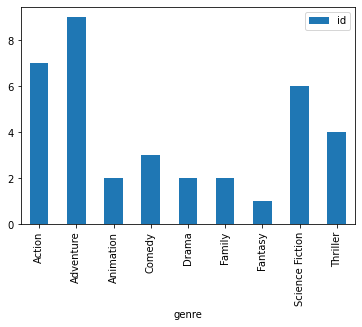

In [52]:
import matplotlib.pyplot as plt

# Count the number of movies by genre
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

### Exercise 3 - Using outer join to select actors

* One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. 
* To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

* Using an outer join, you are able to pick only those rows where the actor played in only one of the two movies.

In [53]:
filename = 'Movie Actors Iron Man 1.p'
iron_1_actors = pd.read_pickle(datapath + filename)
print(iron_1_actors.head())
print(iron_1_actors.shape)

filename = 'Movie Actors Iron Man 2.p'
iron_2_actors = pd.read_pickle(datapath + filename)
print(iron_2_actors.head())
print(iron_2_actors.shape)

                     character     id             name
0                       Yinsen  17857       Shaun Toub
1      Virginia "Pepper" Potts  12052  Gwyneth Paltrow
2  Obadiah Stane / Iron Monger   1229     Jeff Bridges
3                  War Machine  18288  Terrence Howard
4           Christine Everhart  57451      Leslie Bibb
(87, 3)
                                          character     id                name
0                             Ivan Vanko / Whiplash   2295       Mickey Rourke
1  Natalie Rushman / Natasha Romanoff / Black Widow   1245  Scarlett Johansson
2                                     Justin Hammer   6807        Sam Rockwell
3                                Director Nick Fury   2231   Samuel L. Jackson
4                           Virginia "Pepper" Potts  12052     Gwyneth Paltrow
(115, 3)


In [54]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on='id', how='outer',
                                   suffixes=('_1', '_2'))

In [55]:
# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1      id           name_1 character_2 name_2
0                       Yinsen   17857       Shaun Toub         NaN    NaN
2  Obadiah Stane / Iron Monger    1229     Jeff Bridges         NaN    NaN
3                  War Machine   18288  Terrence Howard         NaN    NaN
5                         Raza   57452      Faran Tahir         NaN    NaN
8                   Abu Bakaar  173810    Sayed Badreya         NaN    NaN


## Merging a Table to Itself 

* We merge two copies of the same table.
* We can merge tables on different columns. 
* With the example below we can list the original movie and its sequel in one row.


Common situations you might need to merge a table to itself:
* Hierarquical relationships
  * E.g.: Employee and manager.
* Sequential relationships
  * E.g.: Logistic movements.
* Graph data
  * E.g.: Network of friends.

In [56]:
filename = 'Movie Sequels.p'
sequels = pd.read_pickle(datapath + filename)
print(sequels.head())
print(sequels.shape)

      id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>
(4803, 3)


In [57]:
original_sequels = sequels.merge(sequels, left_on='sequel', right_on= 'id',
                                 suffixes=('_org' , '_seq'))
print(original_sequels.head())

   id_org                                          title_org  sequel_org  id_seq                                      title_seq  sequel_seq
0     862                                          Toy Story         863     863                                    Toy Story 2       10193
1     863                                        Toy Story 2       10193   10193                                    Toy Story 3        <NA>
2     675          Harry Potter and the Order of the Phoenix         767     767         Harry Potter and the Half-Blood Prince        <NA>
3     121              The Lord of the Rings: The Two Towers         122     122  The Lord of the Rings: The Return of the King        <NA>
4     120  The Lord of the Rings: The Fellowship of the Ring         121     121          The Lord of the Rings: The Two Towers         122


### Continue format results

In [58]:
print(original_sequels[['title_org','title_seq']].head())

                                           title_org                                      title_seq
0                                          Toy Story                                    Toy Story 2
1                                        Toy Story 2                                    Toy Story 3
2          Harry Potter and the Order of the Phoenix         Harry Potter and the Half-Blood Prince
3              The Lord of the Rings: The Two Towers  The Lord of the Rings: The Return of the King
4  The Lord of the Rings: The Fellowship of the Ring          The Lord of the Rings: The Two Towers


### Merging a table to itself with left join

* We can use the different types of joins we have already reviewed.
* Merging a table to itself can allow you to compare values in a column to other values in the same column.
* Merging a table to itself is like working with two separate tables.


In [59]:
# The resulting table will show all of our original movie info.
original_sequels = sequels.merge(sequels, left_on='sequel', right_on='id',
                                 how='left', suffixes=('_org', '_seq'))
print(original_sequels.head())

   id_org     title_org  sequel_org  id_seq    title_seq  sequel_seq
0   19995        Avatar        <NA>    <NA>          NaN        <NA>
1     862     Toy Story         863     863  Toy Story 2       10193
2     863   Toy Story 2       10193   10193  Toy Story 3        <NA>
3     597       Titanic        <NA>    <NA>          NaN        <NA>
4   24428  The Avengers        <NA>    <NA>          NaN        <NA>


### Exercise 1 - Self join

* Merging a table to itself can be useful when you want to compare values in a column to other values in the same column.
* In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. 
* You have been given a table called crews, which has columns id, job, and name. 
* First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

Result:
* By merging the table to itself, you compared the value of the director from the jobs column to other values from the jobs column. With the output, you can quickly see different movie directors and the people they worked with in the same movie.

In [60]:
filename = 'Movie Crews.p'
crews = pd.read_pickle(datapath + filename)
print(crews.head())
print(crews.shape)

      id  department             job               name
0  19995     Editing          Editor  Stephen E. Rivkin
2  19995       Sound  Sound Designer  Christopher Boyes
4  19995  Production         Casting          Mali Finn
6  19995   Directing        Director      James Cameron
7  19995     Writing          Writer      James Cameron
(42502, 4)


In [61]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner', 
                                suffixes=('_dir', '_crew'))
print(crews_self_merged.head())

      id department_dir job_dir           name_dir department_crew        job_crew          name_crew
0  19995        Editing  Editor  Stephen E. Rivkin         Editing          Editor  Stephen E. Rivkin
1  19995        Editing  Editor  Stephen E. Rivkin           Sound  Sound Designer  Christopher Boyes
2  19995        Editing  Editor  Stephen E. Rivkin      Production         Casting          Mali Finn
3  19995        Editing  Editor  Stephen E. Rivkin       Directing        Director      James Cameron
4  19995        Editing  Editor  Stephen E. Rivkin         Writing          Writer      James Cameron


In [62]:
# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew        job_crew          name_crew
156  19995      Directing  Director  James Cameron         Editing          Editor  Stephen E. Rivkin
157  19995      Directing  Director  James Cameron           Sound  Sound Designer  Christopher Boyes
158  19995      Directing  Director  James Cameron      Production         Casting          Mali Finn
160  19995      Directing  Director  James Cameron         Writing          Writer      James Cameron
161  19995      Directing  Director  James Cameron             Art    Set Designer    Richard F. Mays


## Merging on Indexes

* Often, the DataFrame indexes are given a unique id that we can use when merging two tables together.
* The merge method automatically adjusts to accept index names or column names.

### Setting an index

In [63]:
filename = 'Movies.csv'
movies = pd.read_csv(datapath + filename, index_col=['id'])
movies = movies[['title', 'popularity', 'release_date']]
print(movies.head())

                      title  popularity release_date
id                                                  
257            Oliver Twist   20.415572   2005-09-23
14290  Better Luck Tomorrow    3.877036   2002-01-12
38365             Grown Ups   38.864027   2010-06-24
9672               Infamous    3.680896   2006-11-16
12819       Alpha and Omega   12.300789   2010-09-17


In [64]:
filename = 'Movie Tag Lines.p'
taglines = pd.read_pickle(datapath + filename)
taglines = taglines.set_index('id')
print(taglines.head())

                                               tagline
id                                                    
19995                      Enter the World of Pandora.
285     At the end of the world, the adventure begins.
206647                           A Plan No One Escapes
49026                                  The Legend Ends
49529             Lost in our world, found in another.


### Merging on index

* We merge by the index, now set as column 'id' for both tables.

In [65]:
movies_taglines = movies.merge(taglines, on='id', how='left')
print(movies_taglines.head())

                      title  popularity release_date                                          tagline
id                                                                                                   
257            Oliver Twist   20.415572   2005-09-23                                              NaN
14290  Better Luck Tomorrow    3.877036   2002-01-12             Never underestimate an overachiever.
38365             Grown Ups   38.864027   2010-06-24  Boys will be boys. . . some longer than others.
9672               Infamous    3.680896   2006-11-16          There's more to the story than you know
12819       Alpha and Omega   12.300789   2010-09-17                           A Pawsome 3D Adventure


### MultiIndex datasets

* In this example, since we make an *inner join*, both the `movie_id` and `cast_id` must match in each table to be returned in the result. It's interesting to see that Samuel Jackson has acted in over 65 movies! That's a lot.

In [66]:
filename = 'Movie Casts.p'
casts = pd.read_pickle(datapath + filename)

casts_samuel = casts[casts['name'] == 'Samuel L. Jackson']
casts_samuel = casts_samuel[['movie_id', 'cast_id', 'name']]
casts_samuel = casts_samuel.set_index(['movie_id', 'cast_id'])
print(casts_samuel.head())

casts = casts[['movie_id', 'cast_id', 'character']]
casts = casts.set_index(['movie_id', 'cast_id'])
print(casts.head())

                               name
movie_id cast_id                   
184      3        Samuel L. Jackson
319      13       Samuel L. Jackson
326      2        Samuel L. Jackson
329      138      Samuel L. Jackson
393      21       Samuel L. Jackson
                 character
movie_id cast_id          
5        22        Jezebel
         23          Diana
         24         Athena
         25        Elspeth
         26            Eva


In [67]:
samuel_casts = casts_samuel.merge(casts, on=['movie_id', 'cast_id'])
print(samuel_casts.head())
print(samuel_casts.shape)

                               name      character
movie_id cast_id                                  
184      3        Samuel L. Jackson  Ordell Robbie
319      13       Samuel L. Jackson        Big Don
326      2        Samuel L. Jackson  Neville Flynn
329      138      Samuel L. Jackson         Arnold
393      21       Samuel L. Jackson          Rufus
(67, 2)


## Index merge with different index names 

* We can use `left_on` and `right_on` 
* Additionally, since we are merging on indexes, we need to set `left_index` and `right_index` to `True`.
  * These arguments take only `True` or `False`. 
* Whenever we are using the `left_on` or `right_on` arguments **with an index**, we need to set the respective `left_index` and `right_index` arguments to True. 
  * The `left_index` and `right_index` tell the merge method to use the separate indexes.

In [68]:
filename = 'Movies.csv'
movies = pd.read_csv(datapath + filename, index_col=['id'])
movies = movies[['title', 'popularity', 'release_date']]
print(movies.head())

movie_genres = movie_to_genres.set_index('movie_id')
print(movie_genres.head())

                      title  popularity release_date
id                                                  
257            Oliver Twist   20.415572   2005-09-23
14290  Better Luck Tomorrow    3.877036   2002-01-12
38365             Grown Ups   38.864027   2010-06-24
9672               Infamous    3.680896   2006-11-16
12819       Alpha and Omega   12.300789   2010-09-17
                    genre
movie_id                 
5                   Crime
5                  Comedy
11        Science Fiction
11                 Action
11              Adventure


In [69]:
movies_genres = movies.merge(movie_to_genres, 
                             left_on='id', left_index=True,
                             right_on='movie_id', right_index=True)
print(movies_genres.head())


          id         title  popularity release_date  movie_id    genre
257      257  Oliver Twist   20.415572   2005-09-23       194   Comedy
9672    9672      Infamous    3.680896   2006-11-16     66125    Drama
10956  10956      Joe Dirt   15.976335   2001-04-10    181283    Crime
2757    2757   Adaptation.   26.441669   2002-12-06      7364  Mystery
2610    2610      Shopgirl    4.820166   2005-10-21      6282   Comedy


### Exercise 1 - Index merge for movie ratings

* To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. 
* Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.

In [70]:
filename = 'Movies.p'
movies = pd.read_pickle(datapath + filename)
print(movies.head())
print(movies.shape)

filename = 'Movie Ratings.p'
ratings = pd.read_pickle(datapath + filename)
print(ratings.head())
print(ratings.shape)

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
(4803, 4)
       id  vote_average  vote_count
0   19995           7.2     11800.0
1     285           6.9      4500.0
2  206647           6.3      4466.0
3   49026           7.6      9106.0
4   49529           6.1      2124.0
(4803, 3)


In [71]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id', how='left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  vote_count
0    257          Oliver Twist   20.415572   2005-09-23           6.7       274.0
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5        27.0
2  38365             Grown Ups   38.864027   2010-06-24           6.0      1705.0
3   9672              Infamous    3.680896   2006-11-16           6.4        60.0
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3       124.0


### Exercise 2 - Do sequels earn more?

* It is time to put together many of the aspects that you have learned in this chapter. 
* In this exercise, you'll find out which movie sequels earned the most compared to the original movie.
* To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID.
* You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result.
* From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel.
* Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [72]:
import numpy as np

filename = 'Movie Sequels.p'
sequels = pd.read_pickle(datapath + filename)
sequels = sequels.set_index('id')
sequels = sequels.replace(to_replace=np.NaN, value=-1)
print(sequels.head())
print(sequels.shape)

filename = 'Movie Financial Data.p'
financials = pd.read_pickle(datapath + filename)
financials = financials.set_index('id')
print(financials.head())
print(financials.shape)

              title  sequel
id                         
19995        Avatar      -1
862       Toy Story     863
863     Toy Story 2   10193
597         Titanic      -1
24428  The Avengers      -1
(4803, 2)
           budget       revenue
id                             
19995   237000000  2.787965e+09
285     300000000  9.610000e+08
206647  245000000  8.806746e+08
49026   250000000  1.084939e+09
49529   260000000  2.841391e+08
(3229, 2)


In [73]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')
sequels_fin

,title,sequel,budget,revenue
id,,,,
19995,Avatar,-1,237000000.0,2.787965e+09
862,Toy Story,863,30000000.0,3.735540e+08
863,Toy Story 2,10193,90000000.0,4.973669e+08
597,Titanic,-1,200000000.0,1.845034e+09
24428,The Avengers,-1,220000000.0,1.519558e+09
...,...,...,...,...
133931,Zambezia,-1,NaN,NaN
309503,Zipper,-1,NaN,NaN
34592,ZMD: Zombies of Mass Destruction,-1,NaN,NaN


In [74]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

In [75]:
# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

In [76]:
# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values(by='diff', ascending=False).head())

               title_org        title_seq          diff
id                                                     
331    Jurassic Park III   Jurassic World  1.144748e+09
272        Batman Begins  The Dark Knight  6.303398e+08
10138         Iron Man 2       Iron Man 3  5.915067e+08
863          Toy Story 2      Toy Story 3  5.696028e+08
10764  Quantum of Solace          Skyfall  5.224703e+08


# Chapter 3 - Advanced Merging and Concatenating

In this chapter, you’ll leverage powerful filtering techniques, including semi-joins and anti-joins. You’ll also learn how to glue DataFrames by vertically combining and using the pandas.concat function to create new datasets. Finally, because data is rarely clean, you’ll also learn how to validate your newly combined data structures.

## Filtering Joins

* Pandas doesn't provide direct support for filtering joins, but we will learn how to replicate them.


* **Mutating joins**
  * Is what we have been using so far.
  * Combines data from two tables based on matching observations in both tables.
* **Filtering joins**
  * Filter observations from table based on whether or not they match an observation in another table



### What is a semi-join?

* A semi-join filters the left table down to those observations that have a match in the right table. 
* It is similar to an inner join where only the intersection between the tables is returned, but unlike an inner join, **only the columns from the left table are shown**.
* Finally, no duplicate rows from the left table are returned, even if there is a one-to-many relationship.

#### Example

* We have a table of song genres called `genres`.
* We also have a table of top-rated song tracks called `top_tracks`.
* The 'gid' column connects the two tables.
* We want to find what genres appear in our table of top songs.
* A semi-join will return only the columns from the genre table and not the tracks.

In [77]:
# Step 1 - Merging tables
if False:
    genres_tracks = genres.merge(top_tracks, on='gid')

In [78]:
# Step 2 - Use of isin() method
if False:
    genres['gid'].isin(genres_tracks['gid'])

'''
This will tell us if our genre appears in our merged genres_tracks table.
'''

'\nThis will tell us if our genre appears in our merged genres_tracks table.\n'

In [79]:
# Step 3 - Semi-join 
if False:
    genres_tracks = genres.merge(top_tracks, on='gid')
    top_genres = genres[genres['gid'].isin(genres_tracks['gid'])]
    print(top_genres.head())

'''
* These are rows in the genre table that are also found in the top_tracks table.
* This is called a filtering join because we've filtered the genres table by what's
in the top_tracks table.
* Only the columns of the left table are shown.
'''

"\n* These are rows in the genre table that are also found in the top_tracks table.\n* This is called a filtering join because we've filtered the genres table by what's\nin the top_tracks table.\n* Only the columns of the left table are shown.\n"

### What is an anti-join?

* An anti-join returns the observations in the left table that do not have a matching observation in the right table.
* It also only returns the columns from the left table.

#### Example

Now, instead of finding which genres are in the table of top tracks, we want to find which genres **are not** with an anti-join.

In [80]:
# Step 1 - Merging tables
if False:
    genres_tracks = genres.merge(top_tracks, on='gid', 
                                 how='left', indicator=True)

'''
* With indicator set to True, the merge method adds a column called
"_merge" to the output. This column tells the source of each row. 
'''

'\n* With indicator set to True, the merge method adds a column called\n"_merge" to the output. This column tells the source of each row. \n'

In [81]:
# Step 2 - 'gid' from right table
if False:
    gid_list = genres_tracks.loc[genres_tracks['_merge'] == 'left_only', 'gid']

'''
* We use the "loc" accessor and "_merge" column to select the rows that only appeared 
in the left table and return only the "gid" column from the genres_tracks table.
* We now have a list of gids not in the tracks table.
'''

'\n* We use the "loc" accessor and "_merge" column to select the rows that only appeared \nin the left table and return only the "gid" column from the genres_tracks table.\n* We now have a list of gids not in the tracks table.\n'

In [82]:
# Step 3 - Anti-join
if False:
    genres_tracks = genres.merge(top_tracks, on='gid', 
                                 how='left', indicator=True)
    gid_list = genres_tracks.loc[genres_tracks['_merge'] == 'left_only', 'gid'] # 
    non_top_genres = genres[genres['gid'].isin(gid_list)]
    print(non_top_genres.head())

'''
* In our final step we use the isin() method to filter for the rows with gids in our gid_list.
* Our output shows those genres not in the tracks table.
'''

'\n* In our final step we use the isin() method to filter for the rows with gids in our gid_list.\n* Our output shows those genres not in the tracks table.\n'

### Exercise 1 - Performing an anti-join

In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti-join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

Results: You performed an anti-join by first merging the tables with a left join, selecting the ID of those employees who did not support a top customer, and then subsetting the original employee's table. From that, we can see that there are five employees not supporting top customers. Anti-joins are a powerful tool to filter a main table (i.e. employees) by another (i.e. customers).

In [83]:
if False:
    # Merge employees and top_cust
    empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

    # Select the srid column where _merge is left_only
    srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

    # Get employees not working with top customers
    print(employees[employees['srid'].isin(srid_list)])

### Exercise 2 - Performing a semi-join

Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi-join to find the top revenue-generating non-musical tracks.

Result: In this exercise, you replicated a semi-join to filter the table of tracks by the table of invoice items to find the top revenue non-musical tracks. With some additional data manipulation, you discovered that 'TV-shows' is the non-musical genre that has the most top revenue-generating tracks. Now that you've done both semi- and anti-joins, it's time to move to the next topic.

In [84]:
if False:
    # Merge the non_mus_tck and top_invoices tables on tid
    tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

    # Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
    top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

    # Group the top_tracks by gid and count the tid rows
    cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

    # Merge the genres table to cnt_by_gid on gid and print
    print(cnt_by_gid.merge(genres, on='gid'))

## Concatenate DataFrames Together Vertically

* Pandas `.concat()` method can concatenate
both vertical and horizontal.
  * `axis=0` , vertical

### Basic concatenation

* 3 different tables
* Same column names
* Table variable names:
  * `inv_jan` (top
  * `inv_feb` (middle)
  * `inv_mar` (bottom)

In [85]:
# Concatenation resulting in a vertically combined table
if False:
    pd.concat([inv_jan, inv_feb, inv_mar]) 

### Ignoring the index

* If we simply do a `.concat()`, as the example above, the original indexes of each row are retained. This behaviour leeds to duplicated indexes.
* We can use argument `ignore_index` set to `True` in order to ignore the original indexes of the tables.
  * The resulting table has indexes going from `0` to `n-1`

In [86]:
if False:
    pd.concat([inv_jan, inv_feb, inv_mar], ignore_index=True)

### Setting labels to original tables

* We can also associate specific keys with each of the pieces of our three original tables.
* Using argument `keys` an extra index is added to each row, refering to the original table of that piece of data.
* We **must** set `ignore_index` to `False` since you can't add a key and ignore the index at the same time.
* This results in a table with a multi-index, with the label on the first level.

In [87]:
if False:
    pd.concat([inv_jan, inv_feb, inv_mar],
          ignore_index=False, 
          keys=['jan','feb','mar'])

### Concatenate tables with different column names

* The concat method by default will include all of the columns in the different tables it's combining.
* The sort argument, if true, will alphabetically sort the different column names in the result. 
* In our example the January invoices table does not have a column that is in February invoices table, which results is NaN values for that column for January invoices. (see pdf slides)

In [88]:
if False:
    pd.concat([inv_jan, inv_feb],
              sort=True)

* We can also use the `join` argument set to `inner`, which will only concat the columns present in both tables.

In [89]:
if False:
    pd.concat([inv_jan, inv_feb],
              join='inner')

### Using append method

* `.append()` is a simplied version of `.concat()`
* Supports: `ignore_index` , and `sort`
* Does Not Support: `keys` and `join`
* Argument `join` is always set to `outer`

In [90]:
if False:
    inv_jan.append([inv_feb, inv_mar],
                   ignore_index=True,
                   sort=True)

### Exercise 1 - Concatenation basics

You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the .concat() method by concatenating the tables vertically together in different ways.


In [91]:
# Datasets
tracks_master_list = [[1853, 'Battery', 152, 1, 3, 'J.Hetfield/L.Ulrich', 0.99],
       [1854, 'Master Of Puppets', 152, 1, 3, 'K.Hammett', 0.99],
       [1857, 'Disposable Heroes', 152, 1, 3, 'J.Hetfield/L.Ulrich',
        0.99]]
tracks_ride_list = [[1874, 'Fight Fire With Fire', 154, 1, 3, 0.99],
       [1875, 'Ride The Lightning', 154, 1, 3, 0.99],
       [1876, 'For Whom The Bell Tolls', 154, 1, 3, 0.99],
       [1877, 'Fade To Black', 154, 1, 3, 0.99],
       [1878, 'Trapped Under Ice', 154, 1, 3, 0.99]]
tracks_st_list = [[1882, 'Frantic', 155, 1, 3, 0.99],
       [1883, 'St. Anger', 155, 1, 3, 0.99],
       [1884, 'Some Kind Of Monster', 155, 1, 3, 0.99],
       [1885, 'Dirty Window', 155, 1, 3, 0.99],
       [1886, 'Invisible Kid', 155, 1, 3, 0.99]]

# DataFrames
tracks_master = pd.DataFrame(tracks_master_list, columns=['tid', 'name', 'aid', 'mtid', 'gid', 'composer', 'u_price'])
tracks_ride = pd.DataFrame(tracks_ride_list, columns=['tid', 'name', 'aid', 'mtid', 'gid', 'u_price'])
tracks_st = pd.DataFrame(tracks_st_list, columns=['tid', 'name', 'aid', 'mtid', 'gid', 'u_price'])

In [92]:
tracks_master.head(3)

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrich,0.99
1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99


In [93]:
tracks_ride.head(3)

,tid,name,aid,mtid,gid,u_price
0,1874,Fight Fire With Fire,154,1,3,0.99
1,1875,Ride The Lightning,154,1,3,0.99
2,1876,For Whom The Bell Tolls,154,1,3,0.99


In [94]:
tracks_st.head(3)

,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99
1,1883,St. Anger,155,1,3,0.99
2,1884,Some Kind Of Monster,155,1,3,0.99


In [95]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1       Ride The Lightning  1875     0.99
2  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
3  154                  NaN    3     1            Fade To Black  1877     0.99
4  154                  NaN    3     1        Trapped Under Ice  1878     0.99
0  155                  NaN    3     1                  Frantic  1882     0.99
1  155                  NaN    3     1                St. Anger  1883     0.99
2  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
3  155                  NaN    3     1             D

In [96]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)

    aid             composer  gid  mtid                     name   tid  u_price
0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1   152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
3   154                  NaN    3     1     Fight Fire With Fire  1874     0.99
4   154                  NaN    3     1       Ride The Lightning  1875     0.99
5   154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
6   154                  NaN    3     1            Fade To Black  1877     0.99
7   154                  NaN    3     1        Trapped Under Ice  1878     0.99
8   155                  NaN    3     1                  Frantic  1882     0.99
9   155                  NaN    3     1                St. Anger  1883     0.99
10  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
11  155                  NaN    3     1 

In [97]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)

   aid  gid  mtid                     name   tid  u_price
0  152    3     1                  Battery  1853     0.99
1  152    3     1        Master Of Puppets  1854     0.99
2  152    3     1        Disposable Heroes  1857     0.99
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


### Exercise 2 - Concatenating with keys

The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. 

In [98]:
# Datasets
inv_jul_list = [[42, 51, pd.Timestamp('2009-07-06 00:00:00'), 1.98, 'Sweden'],
       [43, 53, pd.Timestamp('2009-07-06 00:00:00'), 1.98, 'UK'],
       [44, 55, pd.Timestamp('2009-07-07 00:00:00'), 3.96, 'Australia'],
       [45, 59, pd.Timestamp('2009-07-08 00:00:00'), 5.94, 'India'],
       [46, 6, pd.Timestamp('2009-07-11 00:00:00'), 8.91, 'Czech Republic'],
       [47, 15, pd.Timestamp('2009-07-16 00:00:00'), 13.86, 'Canada'],
       [48, 29, pd.Timestamp('2009-07-24 00:00:00'), 0.99, 'Canada'],
       [126, 35, pd.Timestamp('2010-07-13 00:00:00'), 1.98, 'Portugal'],
       [127, 37, pd.Timestamp('2010-07-13 00:00:00'), 1.98, 'Germany'],
       [128, 39, pd.Timestamp('2010-07-14 00:00:00'), 3.96, 'France'],
       [129, 43, pd.Timestamp('2010-07-15 00:00:00'), 5.94, 'France'],
       [130, 49, pd.Timestamp('2010-07-18 00:00:00'), 8.91, 'Poland'],
       [131, 58, pd.Timestamp('2010-07-23 00:00:00'), 13.86, 'India'],
       [132, 13, pd.Timestamp('2010-07-31 00:00:00'), 0.99, 'Brazil'],
       [209, 18, pd.Timestamp('2011-07-07 00:00:00'), 0.99, 'USA'],
       [210, 19, pd.Timestamp('2011-07-20 00:00:00'), 1.98, 'USA'],
       [211, 21, pd.Timestamp('2011-07-20 00:00:00'), 1.98, 'USA'],
       [212, 23, pd.Timestamp('2011-07-21 00:00:00'), 3.96, 'USA'],
       [213, 27, pd.Timestamp('2011-07-22 00:00:00'), 5.94, 'USA'],
       [214, 33, pd.Timestamp('2011-07-25 00:00:00'), 8.91, 'Canada'],
       [215, 42, pd.Timestamp('2011-07-30 00:00:00'), 13.86, 'France'],
       [292, 47, pd.Timestamp('2012-07-05 00:00:00'), 13.86, 'Italy'],
       [293, 2, pd.Timestamp('2012-07-13 00:00:00'), 0.99, 'Germany'],
       [294, 3, pd.Timestamp('2012-07-26 00:00:00'), 1.98, 'Canada'],
       [295, 5, pd.Timestamp('2012-07-26 00:00:00'), 1.98, 'Czech Republic'],
       [296, 7, pd.Timestamp('2012-07-27 00:00:00'), 3.96, 'Austria'],
       [297, 11, pd.Timestamp('2012-07-28 00:00:00'), 5.94, 'Brazil'],
       [298, 17, pd.Timestamp('2012-07-31 00:00:00'), 10.91, 'USA'],
       [371, 8, pd.Timestamp('2013-07-02 00:00:00'), 1.98, 'Belgium'],
       [372, 10, pd.Timestamp('2013-07-02 00:00:00'), 1.98, 'Brazil'],
       [373, 12, pd.Timestamp('2013-07-03 00:00:00'), 3.96, 'Brazil'],
       [374, 16, pd.Timestamp('2013-07-04 00:00:00'), 5.94, 'USA'],
       [375, 22, pd.Timestamp('2013-07-07 00:00:00'), 8.91, 'USA'],
       [376, 31, pd.Timestamp('2013-07-12 00:00:00'), 13.86, 'Canada'],
       [377, 45, pd.Timestamp('2013-07-20 00:00:00'), 0.99, 'Hungary']]
inv_aug_list = [[49, 30, pd.Timestamp('2009-08-06 00:00:00'), 1.98, 'Canada'],
       [50, 32, pd.Timestamp('2009-08-06 00:00:00'), 1.98, 'Canada'],
       [51, 34, pd.Timestamp('2009-08-07 00:00:00'), 3.96, 'Portugal'],
       [52, 38, pd.Timestamp('2009-08-08 00:00:00'), 5.94, 'Germany'],
       [53, 44, pd.Timestamp('2009-08-11 00:00:00'), 8.91, 'Finland'],
       [54, 53, pd.Timestamp('2009-08-16 00:00:00'), 13.86, 'UK'],
       [55, 8, pd.Timestamp('2009-08-24 00:00:00'), 0.99, 'Belgium'],
       [133, 14, pd.Timestamp('2010-08-13 00:00:00'), 1.98, 'Canada'],
       [134, 16, pd.Timestamp('2010-08-13 00:00:00'), 1.98, 'USA'],
       [135, 18, pd.Timestamp('2010-08-14 00:00:00'), 3.96, 'USA'],
       [136, 22, pd.Timestamp('2010-08-15 00:00:00'), 5.94, 'USA'],
       [137, 28, pd.Timestamp('2010-08-18 00:00:00'), 8.91, 'USA'],
       [138, 37, pd.Timestamp('2010-08-23 00:00:00'), 13.86, 'Germany'],
       [139, 51, pd.Timestamp('2010-08-31 00:00:00'), 0.99, 'Sweden'],
       [216, 56, pd.Timestamp('2011-08-07 00:00:00'), 0.99, 'Argentina'],
       [217, 57, pd.Timestamp('2011-08-20 00:00:00'), 1.98, 'Chile'],
       [218, 59, pd.Timestamp('2011-08-20 00:00:00'), 1.98, 'India'],
       [219, 2, pd.Timestamp('2011-08-21 00:00:00'), 3.96, 'Germany'],
       [220, 6, pd.Timestamp('2011-08-22 00:00:00'), 5.94, 'Czech Republic'],
       [221, 12, pd.Timestamp('2011-08-25 00:00:00'), 8.91, 'Brazil'],
       [222, 21, pd.Timestamp('2011-08-30 00:00:00'), 13.86, 'USA'],
       [299, 26, pd.Timestamp('2012-08-05 00:00:00'), 23.86, 'USA'],
       [300, 40, pd.Timestamp('2012-08-13 00:00:00'), 0.99, 'France'],
       [301, 41, pd.Timestamp('2012-08-26 00:00:00'), 1.98, 'France'],
       [302, 43, pd.Timestamp('2012-08-26 00:00:00'), 1.98, 'France'],
       [303, 45, pd.Timestamp('2012-08-27 00:00:00'), 3.96, 'Hungary'],
       [304, 49, pd.Timestamp('2012-08-28 00:00:00'), 5.94, 'Poland'],
       [305, 55, pd.Timestamp('2012-08-31 00:00:00'), 8.91, 'Australia'],
       [378, 46, pd.Timestamp('2013-08-02 00:00:00'), 1.98, 'Ireland'],
       [379, 48, pd.Timestamp('2013-08-02 00:00:00'), 1.98, 'Netherlands'],
       [380, 50, pd.Timestamp('2013-08-03 00:00:00'), 3.96, 'Spain'],
       [381, 54, pd.Timestamp('2013-08-04 00:00:00'), 5.94, 'UK'],
       [382, 1, pd.Timestamp('2013-08-07 00:00:00'), 8.91, 'Brazil'],
       [383, 10, pd.Timestamp('2013-08-12 00:00:00'), 13.86, 'Brazil'],
       [384, 24, pd.Timestamp('2013-08-20 00:00:00'), 0.99, 'USA']]
inv_sep_list = [[56, 9, pd.Timestamp('2009-09-06 00:00:00'), 1.98, 'Denmark'],
       [57, 11, pd.Timestamp('2009-09-06 00:00:00'), 1.98, 'Brazil'],
       [58, 13, pd.Timestamp('2009-09-07 00:00:00'), 3.96, 'Brazil'],
       [59, 17, pd.Timestamp('2009-09-08 00:00:00'), 5.94, 'USA'],
       [60, 23, pd.Timestamp('2009-09-11 00:00:00'), 8.91, 'USA'],
       [61, 32, pd.Timestamp('2009-09-16 00:00:00'), 13.86, 'Canada'],
       [62, 46, pd.Timestamp('2009-09-24 00:00:00'), 0.99, 'Ireland'],
       [140, 52, pd.Timestamp('2010-09-13 00:00:00'), 1.98, 'UK'],
       [141, 54, pd.Timestamp('2010-09-13 00:00:00'), 1.98, 'UK'],
       [142, 56, pd.Timestamp('2010-09-14 00:00:00'), 3.96, 'Argentina'],
       [143, 1, pd.Timestamp('2010-09-15 00:00:00'), 5.94, 'Brazil'],
       [144, 7, pd.Timestamp('2010-09-18 00:00:00'), 8.91, 'Austria'],
       [145, 16, pd.Timestamp('2010-09-23 00:00:00'), 13.86, 'USA'],
       [223, 35, pd.Timestamp('2011-09-07 00:00:00'), 0.99, 'Portugal'],
       [224, 36, pd.Timestamp('2011-09-20 00:00:00'), 1.98, 'Germany'],
       [225, 38, pd.Timestamp('2011-09-20 00:00:00'), 1.98, 'Germany'],
       [226, 40, pd.Timestamp('2011-09-21 00:00:00'), 3.96, 'France'],
       [227, 44, pd.Timestamp('2011-09-22 00:00:00'), 5.94, 'Finland'],
       [228, 50, pd.Timestamp('2011-09-25 00:00:00'), 8.91, 'Spain'],
       [229, 59, pd.Timestamp('2011-09-30 00:00:00'), 13.86, 'India'],
       [306, 5, pd.Timestamp('2012-09-05 00:00:00'), 16.86,
        'Czech Republic'],
       [307, 19, pd.Timestamp('2012-09-13 00:00:00'), 1.99, 'USA'],
       [308, 20, pd.Timestamp('2012-09-26 00:00:00'), 3.98, 'USA'],
       [309, 22, pd.Timestamp('2012-09-26 00:00:00'), 3.98, 'USA'],
       [310, 24, pd.Timestamp('2012-09-27 00:00:00'), 7.96, 'USA'],
       [311, 28, pd.Timestamp('2012-09-28 00:00:00'), 11.94, 'USA'],
       [385, 25, pd.Timestamp('2013-09-02 00:00:00'), 1.98, 'USA'],
       [386, 27, pd.Timestamp('2013-09-02 00:00:00'), 1.98, 'USA'],
       [387, 29, pd.Timestamp('2013-09-03 00:00:00'), 3.96, 'Canada'],
       [388, 33, pd.Timestamp('2013-09-04 00:00:00'), 5.94, 'Canada'],
       [389, 39, pd.Timestamp('2013-09-07 00:00:00'), 8.91, 'France'],
       [390, 48, pd.Timestamp('2013-09-12 00:00:00'), 13.86, 'Netherlands'],
       [391, 3, pd.Timestamp('2013-09-20 00:00:00'), 0.99, 'Canada']]

# DataFrames
inv_jul = pd.DataFrame(inv_jul_list, columns=['iid', 'cid', 'invoice_date', 'total', 'bill_ctry'])
inv_aug = pd.DataFrame(inv_aug_list, columns=['iid', 'cid', 'invoice_date', 'total', 'bill_ctry'])
inv_sep = pd.DataFrame(inv_sep_list, columns=['iid', 'cid', 'invoice_date', 'total', 'bill_ctry'])

In [99]:
inv_jul.head(3)

,iid,cid,invoice_date,total,bill_ctry
0,42,51,2009-07-06,1.98,Sweden
1,43,53,2009-07-06,1.98,UK
2,44,55,2009-07-07,3.96,Australia


In [100]:
inv_aug.head(3)

,iid,cid,invoice_date,total,bill_ctry
0,49,30,2009-08-06,1.98,Canada
1,50,32,2009-08-06,1.98,Canada
2,51,34,2009-08-07,3.96,Portugal


In [101]:
inv_sep.head(3)

,iid,cid,invoice_date,total,bill_ctry
0,56,9,2009-09-06,1.98,Denmark
1,57,11,2009-09-06,1.98,Brazil
2,58,13,2009-09-07,3.96,Brazil


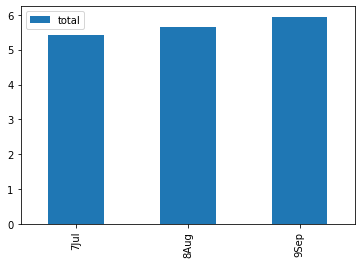

In [102]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

### Exercise 3 - Using the append method

The .concat() method is excellent when you need a lot of control over how concatenation is performed. However, if you do not need as much control, then the .append() method is another option. You'll try this method out by appending the track lists together from different Metallica albums. From there, you will merge it with the invoice_items table to determine which track sold the most.

In [103]:
# Dataset
invoice_items_list = [
       [1.730e+02, 3.200e+01, 1.018e+03, 9.900e-01, 1.000e+00],
       [1.740e+02, 3.300e+01, 1.027e+03, 9.900e-01, 1.000e+00],
       [1.750e+02, 3.300e+01, 1.036e+03, 9.900e-01, 1.000e+00],
       [1.760e+02, 3.300e+01, 1.045e+03, 9.900e-01, 1.000e+00],
       [1.770e+02, 3.300e+01, 1.054e+03, 9.900e-01, 1.000e+00],
       [1.780e+02, 3.300e+01, 1.063e+03, 9.900e-01, 1.000e+00],
       [1.790e+02, 3.300e+01, 1.072e+03, 9.900e-01, 1.000e+00],
       [1.800e+02, 3.300e+01, 1.081e+03, 9.900e-01, 1.000e+00],
       [1.810e+02, 3.300e+01, 1.090e+03, 9.900e-01, 1.000e+00],
       [1.820e+02, 3.300e+01, 1.099e+03, 9.900e-01, 1.000e+00],
       [1.830e+02, 3.300e+01, 1.108e+03, 9.900e-01, 1.000e+00],
       [1.840e+02, 3.300e+01, 1.117e+03, 9.900e-01, 1.000e+00],
       [1.850e+02, 3.300e+01, 1.126e+03, 9.900e-01, 1.000e+00],
       [1.860e+02, 3.300e+01, 1.135e+03, 9.900e-01, 1.000e+00],
       [1.870e+02, 3.300e+01, 1.144e+03, 9.900e-01, 1.000e+00],
       [1.880e+02, 3.400e+01, 1.158e+03, 9.900e-01, 1.000e+00],
       [1.890e+02, 3.500e+01, 1.159e+03, 9.900e-01, 1.000e+00],
       [1.900e+02, 3.500e+01, 1.160e+03, 9.900e-01, 1.000e+00],
       [1.910e+02, 3.600e+01, 1.162e+03, 9.900e-01, 1.000e+00],
       [1.920e+02, 3.600e+01, 1.164e+03, 9.900e-01, 1.000e+00],
       [1.930e+02, 3.700e+01, 1.166e+03, 9.900e-01, 1.000e+00],
       [1.940e+02, 3.700e+01, 1.168e+03, 9.900e-01, 1.000e+00],
       [1.950e+02, 3.700e+01, 1.170e+03, 9.900e-01, 1.000e+00],
       [1.960e+02, 3.700e+01, 1.172e+03, 9.900e-01, 1.000e+00],
       [1.970e+02, 3.800e+01, 1.176e+03, 9.900e-01, 1.000e+00],
       [1.980e+02, 3.800e+01, 1.180e+03, 9.900e-01, 1.000e+00],
       [1.990e+02, 3.800e+01, 1.184e+03, 9.900e-01, 1.000e+00],
       [2.000e+02, 3.800e+01, 1.188e+03, 9.900e-01, 1.000e+00],
       [2.010e+02, 3.800e+01, 1.192e+03, 9.900e-01, 1.000e+00],
       [2.020e+02, 3.800e+01, 1.196e+03, 9.900e-01, 1.000e+00],
       [2.030e+02, 3.900e+01, 1.202e+03, 9.900e-01, 1.000e+00],
       [2.040e+02, 3.900e+01, 1.208e+03, 9.900e-01, 1.000e+00],
       [2.050e+02, 3.900e+01, 1.214e+03, 9.900e-01, 1.000e+00],
       [2.060e+02, 3.900e+01, 1.220e+03, 9.900e-01, 1.000e+00],
       [2.070e+02, 3.900e+01, 1.226e+03, 9.900e-01, 1.000e+00],
       [2.080e+02, 3.900e+01, 1.232e+03, 9.900e-01, 1.000e+00],
       [2.090e+02, 3.900e+01, 1.238e+03, 9.900e-01, 1.000e+00],
       [2.100e+02, 3.900e+01, 1.244e+03, 9.900e-01, 1.000e+00],
       [2.110e+02, 3.900e+01, 1.250e+03, 9.900e-01, 1.000e+00],
       [2.120e+02, 4.000e+01, 1.259e+03, 9.900e-01, 1.000e+00],
       [2.130e+02, 4.000e+01, 1.268e+03, 9.900e-01, 1.000e+00],
       [2.140e+02, 4.000e+01, 1.277e+03, 9.900e-01, 1.000e+00],
       [2.150e+02, 4.000e+01, 1.286e+03, 9.900e-01, 1.000e+00],
       [2.160e+02, 4.000e+01, 1.295e+03, 9.900e-01, 1.000e+00],
       [2.170e+02, 4.000e+01, 1.304e+03, 9.900e-01, 1.000e+00],
       [2.180e+02, 4.000e+01, 1.313e+03, 9.900e-01, 1.000e+00],
       [2.190e+02, 4.000e+01, 1.322e+03, 9.900e-01, 1.000e+00],
       [2.200e+02, 4.000e+01, 1.331e+03, 9.900e-01, 1.000e+00],
       [2.210e+02, 4.000e+01, 1.340e+03, 9.900e-01, 1.000e+00],
       [2.220e+02, 4.000e+01, 1.349e+03, 9.900e-01, 1.000e+00],
       [2.230e+02, 4.000e+01, 1.358e+03, 9.900e-01, 1.000e+00],
       [2.240e+02, 4.000e+01, 1.367e+03, 9.900e-01, 1.000e+00],
       [2.250e+02, 4.000e+01, 1.376e+03, 9.900e-01, 1.000e+00],
       [2.260e+02, 4.100e+01, 1.390e+03, 9.900e-01, 1.000e+00],
       [2.270e+02, 4.200e+01, 1.391e+03, 9.900e-01, 1.000e+00],
       [2.280e+02, 4.200e+01, 1.392e+03, 9.900e-01, 1.000e+00],
       [2.290e+02, 4.300e+01, 1.394e+03, 9.900e-01, 1.000e+00],
       [2.300e+02, 4.300e+01, 1.396e+03, 9.900e-01, 1.000e+00],
       [2.310e+02, 4.400e+01, 1.398e+03, 9.900e-01, 1.000e+00],
       [2.320e+02, 4.400e+01, 1.400e+03, 9.900e-01, 1.000e+00],
       [2.330e+02, 4.400e+01, 1.402e+03, 9.900e-01, 1.000e+00],
       [2.340e+02, 4.400e+01, 1.404e+03, 9.900e-01, 1.000e+00],
       [2.350e+02, 4.500e+01, 1.408e+03, 9.900e-01, 1.000e+00],
       [2.360e+02, 4.500e+01, 1.412e+03, 9.900e-01, 1.000e+00],
       [2.370e+02, 4.500e+01, 1.416e+03, 9.900e-01, 1.000e+00],
       [2.380e+02, 4.500e+01, 1.420e+03, 9.900e-01, 1.000e+00],
       [2.390e+02, 4.500e+01, 1.424e+03, 9.900e-01, 1.000e+00],
       [2.400e+02, 4.500e+01, 1.428e+03, 9.900e-01, 1.000e+00],
       [2.410e+02, 4.600e+01, 1.434e+03, 9.900e-01, 1.000e+00],
       [2.420e+02, 4.600e+01, 1.440e+03, 9.900e-01, 1.000e+00],
       [2.430e+02, 4.600e+01, 1.446e+03, 9.900e-01, 1.000e+00],
       [2.440e+02, 4.600e+01, 1.452e+03, 9.900e-01, 1.000e+00],
       [2.450e+02, 4.600e+01, 1.458e+03, 9.900e-01, 1.000e+00],
       [2.460e+02, 4.600e+01, 1.464e+03, 9.900e-01, 1.000e+00],
       [2.470e+02, 4.600e+01, 1.470e+03, 9.900e-01, 1.000e+00],
       [2.480e+02, 4.600e+01, 1.476e+03, 9.900e-01, 1.000e+00],
       [2.490e+02, 4.600e+01, 1.482e+03, 9.900e-01, 1.000e+00],
       [2.500e+02, 4.700e+01, 1.491e+03, 9.900e-01, 1.000e+00],
       [2.510e+02, 4.700e+01, 1.500e+03, 9.900e-01, 1.000e+00],
       [2.520e+02, 4.700e+01, 1.509e+03, 9.900e-01, 1.000e+00],
       [2.530e+02, 4.700e+01, 1.518e+03, 9.900e-01, 1.000e+00],
       [2.540e+02, 4.700e+01, 1.527e+03, 9.900e-01, 1.000e+00],
       [2.550e+02, 4.700e+01, 1.536e+03, 9.900e-01, 1.000e+00],
       [2.560e+02, 4.700e+01, 1.545e+03, 9.900e-01, 1.000e+00],
       [2.570e+02, 4.700e+01, 1.554e+03, 9.900e-01, 1.000e+00],
       [2.580e+02, 4.700e+01, 1.563e+03, 9.900e-01, 1.000e+00],
       [2.590e+02, 4.700e+01, 1.572e+03, 9.900e-01, 1.000e+00],
       [2.600e+02, 4.700e+01, 1.581e+03, 9.900e-01, 1.000e+00],
       [2.610e+02, 4.700e+01, 1.590e+03, 9.900e-01, 1.000e+00],
       [2.620e+02, 4.700e+01, 1.599e+03, 9.900e-01, 1.000e+00],
       [2.630e+02, 4.700e+01, 1.608e+03, 9.900e-01, 1.000e+00],
       [2.640e+02, 4.800e+01, 1.622e+03, 9.900e-01, 1.000e+00],
       [2.650e+02, 4.900e+01, 1.623e+03, 9.900e-01, 1.000e+00],
       [2.660e+02, 4.900e+01, 1.624e+03, 9.900e-01, 1.000e+00],
       [2.670e+02, 5.000e+01, 1.626e+03, 9.900e-01, 1.000e+00],
       [2.680e+02, 5.000e+01, 1.628e+03, 9.900e-01, 1.000e+00],
       [2.690e+02, 5.100e+01, 1.630e+03, 9.900e-01, 1.000e+00],
       [2.700e+02, 5.100e+01, 1.632e+03, 9.900e-01, 1.000e+00],
       [2.710e+02, 5.100e+01, 1.634e+03, 9.900e-01, 1.000e+00],
       [2.720e+02, 5.100e+01, 1.636e+03, 9.900e-01, 1.000e+00],
       [2.730e+02, 5.200e+01, 1.640e+03, 9.900e-01, 1.000e+00],
       [2.740e+02, 5.200e+01, 1.644e+03, 9.900e-01, 1.000e+00],
       [2.750e+02, 5.200e+01, 1.648e+03, 9.900e-01, 1.000e+00],
       [2.760e+02, 5.200e+01, 1.652e+03, 9.900e-01, 1.000e+00],
       [2.770e+02, 5.200e+01, 1.656e+03, 9.900e-01, 1.000e+00],
       [2.780e+02, 5.200e+01, 1.660e+03, 9.900e-01, 1.000e+00],
       [2.790e+02, 5.300e+01, 1.666e+03, 9.900e-01, 1.000e+00],
       [2.800e+02, 5.300e+01, 1.672e+03, 9.900e-01, 1.000e+00],
       [2.810e+02, 5.300e+01, 1.678e+03, 9.900e-01, 1.000e+00],
       [2.820e+02, 5.300e+01, 1.684e+03, 9.900e-01, 1.000e+00],
       [2.830e+02, 5.300e+01, 1.690e+03, 9.900e-01, 1.000e+00],
       [2.840e+02, 5.300e+01, 1.696e+03, 9.900e-01, 1.000e+00],
       [2.850e+02, 5.300e+01, 1.702e+03, 9.900e-01, 1.000e+00],
       [2.860e+02, 5.300e+01, 1.708e+03, 9.900e-01, 1.000e+00],
       [2.870e+02, 5.300e+01, 1.714e+03, 9.900e-01, 1.000e+00],
       [2.880e+02, 5.400e+01, 1.723e+03, 9.900e-01, 1.000e+00],
       [2.890e+02, 5.400e+01, 1.732e+03, 9.900e-01, 1.000e+00],
       [2.900e+02, 5.400e+01, 1.741e+03, 9.900e-01, 1.000e+00],
       [2.910e+02, 5.400e+01, 1.750e+03, 9.900e-01, 1.000e+00],
       [2.920e+02, 5.400e+01, 1.759e+03, 9.900e-01, 1.000e+00],
       [2.930e+02, 5.400e+01, 1.768e+03, 9.900e-01, 1.000e+00],
       [2.940e+02, 5.400e+01, 1.777e+03, 9.900e-01, 1.000e+00],
       [2.950e+02, 5.400e+01, 1.786e+03, 9.900e-01, 1.000e+00],
       [2.960e+02, 5.400e+01, 1.795e+03, 9.900e-01, 1.000e+00],
       [2.970e+02, 5.400e+01, 1.804e+03, 9.900e-01, 1.000e+00],
       [2.980e+02, 5.400e+01, 1.813e+03, 9.900e-01, 1.000e+00],
       [2.990e+02, 5.400e+01, 1.822e+03, 9.900e-01, 1.000e+00],
       [3.000e+02, 5.400e+01, 1.831e+03, 9.900e-01, 1.000e+00],
       [3.010e+02, 5.400e+01, 1.840e+03, 9.900e-01, 1.000e+00],
       [3.020e+02, 5.500e+01, 1.854e+03, 9.900e-01, 1.000e+00],
       [3.030e+02, 5.600e+01, 1.855e+03, 9.900e-01, 1.000e+00],
       [3.040e+02, 5.600e+01, 1.856e+03, 9.900e-01, 1.000e+00],
       [3.050e+02, 5.700e+01, 1.858e+03, 9.900e-01, 1.000e+00],
       [3.060e+02, 5.700e+01, 1.860e+03, 9.900e-01, 1.000e+00],
       [3.070e+02, 5.800e+01, 1.862e+03, 9.900e-01, 1.000e+00],
       [3.080e+02, 5.800e+01, 1.864e+03, 9.900e-01, 1.000e+00],
       [3.090e+02, 5.800e+01, 1.866e+03, 9.900e-01, 1.000e+00],
       [3.100e+02, 5.800e+01, 1.868e+03, 9.900e-01, 1.000e+00],
       [3.110e+02, 5.900e+01, 1.872e+03, 9.900e-01, 1.000e+00],
       [3.120e+02, 5.900e+01, 1.876e+03, 9.900e-01, 1.000e+00],
       [3.130e+02, 5.900e+01, 1.880e+03, 9.900e-01, 1.000e+00],
       [3.140e+02, 5.900e+01, 1.884e+03, 9.900e-01, 1.000e+00],
       [3.150e+02, 5.900e+01, 1.888e+03, 9.900e-01, 1.000e+00],
       [3.160e+02, 5.900e+01, 1.892e+03, 9.900e-01, 1.000e+00],
       [3.170e+02, 6.000e+01, 1.898e+03, 9.900e-01, 1.000e+00],
       [3.180e+02, 6.000e+01, 1.904e+03, 9.900e-01, 1.000e+00],
       [3.190e+02, 6.000e+01, 1.910e+03, 9.900e-01, 1.000e+00],
       [3.200e+02, 6.000e+01, 1.916e+03, 9.900e-01, 1.000e+00],
       [3.210e+02, 6.000e+01, 1.922e+03, 9.900e-01, 1.000e+00],
       [3.220e+02, 6.000e+01, 1.928e+03, 9.900e-01, 1.000e+00],
       [3.230e+02, 6.000e+01, 1.934e+03, 9.900e-01, 1.000e+00],
       [3.240e+02, 6.000e+01, 1.940e+03, 9.900e-01, 1.000e+00],
       [3.250e+02, 6.000e+01, 1.946e+03, 9.900e-01, 1.000e+00],
       [3.260e+02, 6.100e+01, 1.955e+03, 9.900e-01, 1.000e+00],
       [3.270e+02, 6.100e+01, 1.964e+03, 9.900e-01, 1.000e+00],
       [3.280e+02, 6.100e+01, 1.973e+03, 9.900e-01, 1.000e+00]]
invoice_items = pd.DataFrame(invoice_items_list, columns=['ilid', 'iid', 'tid', 'uprice', 'quantity'])

In [104]:
invoice_items.head(5)

,ilid,iid,tid,uprice,quantity
0,173.0,32.0,1018.0,0.99,1.0
1,174.0,33.0,1027.0,0.99,1.0
2,175.0,33.0,1036.0,0.99,1.0
3,176.0,33.0,1045.0,0.99,1.0
4,177.0,33.0,1054.0,0.99,1.0


In [105]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on='tid')

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values(by='quantity', ascending=False))

                              quantity
tid  name                             
1854 Master Of Puppets             1.0
1876 For Whom The Bell Tolls       1.0
1884 Some Kind Of Monster          1.0


## Verifying Integrity

* Possible merging issue:
  * Unintentional one-to-many relationship
  * Unintentional many-to-many relationship
* Possible concatenating issue:
  * Duplicate records possibly unintentionally
introduced

### Validating merges

`.merge(validate=None)` :
* Checks if merge is of specied type
* `'one_to_one'`
* `'one_to_many'`
* `'many_to_one'`
* `'many_to_many'`

### Merge validate: one_to_one

* In this example we have tables `tracks` and `specs`
* Each track should have just one set of specifications in table `specs`, so a one-to-one merge.

In [106]:
if False:
    tracks.merge(specs, on='tid', validate='one_to_one')

'''
Traceback (most recent call last):
MergeError: Merge keys are not unique in right dataset; not a one-to-one merge
'''

'\nTraceback (most recent call last):\nMergeError: Merge keys are not unique in right dataset; not a one-to-one merge\n'

* This merge yields an error, because table `specs` has more rows of specficiation for some tracks, which is not what we need.

### Merge validate: one_to_many

* In this example we'll merge album information with the tracks table. 
* For every album there are multiple tracks, so this should be a one-to-many relationship. 
* When we set the validate argument to "one_to_many" no error is raised.

In [107]:
if False:
    albums.merge(tracks, on='aid', validate='one_to_many')

### Verifying concatenations

`.concat(verify_integrity=False)` :
* Check whether the new concatenated index contains duplicates
* Default value is `False`
* If set to `True`, it will check if there are duplicate values in the index and raise an error if there are. 

In [108]:
if False:
    pd.concat([inv_feb, inv_mar], verify_integrity=True)
    # The concat method raises a ValueError stating that the indexes have overlapping values. 

In [109]:
if False:
    pd.concat([inv_feb, inv_mar], verify_integrity=False)
    # The concat method now returns a combined table with the invoice ID of number 9 repeated twice.

### Why verify integrity and what to do

* Why:
  * Real world data is often **NOT** clean
* What to do:
  * Fix incorrect data
  * Drop duplicate rows

# Chapter 4 - Merging Ordered and Time-Series Data

In this final chapter, you’ll step up a gear and learn to apply pandas' specialized methods for merging time-series and ordered data together with real-world financial and economic data from the city of Chicago. You’ll also learn how to query resulting tables using a SQL-style format, and unpivot data using the melt method.

## Using `merge_ordered()`

* This method can merge time-series and other ordered data.
* The merge_ordered method will allow us to merge tables resulting in similar tables to the standard merge method with an outer join, but here that the results are sorted. 
* The sorted results make this a useful method for ordered or time-series data.

### Method characteristics

`merge_ordered()` method:
* Column(s) to join on
  * `on` , `left_on` , and `right_on`
* Type of join
  * `how` (left, right, inner, outer)
  * `default` outer
* Overlapping column names
  * `suffixes`
* Calling the function
  * `pd.merge_ordered(df1, df2)`

In [110]:
# Databases 'appl' and 'mcd'

# Merging stock data
if False:
    import pandas as pd
    pd.merge_ordered(appl, mcd, on='date', suffixes=('_ aapl' , '_ mcd'))

'''
The result is a table sorted by date
'''

'\nThe result is a table sorted by date\n'

### Forward fill

* Missing data can be filled using a technique called forward filling.
* It will interpolate missing data by filling the missing values with the previous value.

In [111]:
if False:
    pd.merge_ordered(appl, mcd, on='date',
                     suffixes=('_ aapl', '_ mcd'),
                     fill_method='ffill')

### When to use merge_ordered()?

* Ordered data / time series
* Filling in missing values
  * Useful for handling missing data, as most machine learning algorithms require that there are no missing values.

### Exercise 1 - Correlation between GDP and S&P500

In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Result: You can see the different aspects of merge_ordered() and how you might use it on data that can be ordered. By using this function, you were able to fill in the missing data from 2019. Finally, the correlation of 0.21 between the GDP and S&P500 is low to moderate at best. You may want to find another predictor if you plan to play in the stock market.

In [112]:
# Datasets
sp500_list = [[ 2.008e+03, -3.849e+01],
       [ 2.009e+03,  2.345e+01],
       [ 2.010e+03,  1.278e+01],
       [ 2.011e+03,  0.000e+00],
       [ 2.012e+03,  1.341e+01],
       [ 2.014e+03,  1.139e+01],
       [ 2.015e+03, -7.300e-01],
       [ 2.016e+03,  9.540e+00],
       [ 2.017e+03,  1.942e+01],
       [ 2.013e+03,  2.960e+01]]
sp500 = pd.DataFrame(sp500_list, columns=['date', 'returns'])

gdp_list = [['USA', 2010, 14992100000000.0],
       ['USA', 2011, 15542600000000.0],
       ['USA', 2012, 16197000000000.0],
       ['USA', 2012, 16197000000000.0],
       ['USA', 2013, 16784800000000.0],
       ['USA', 2014, 17521700000000.0],
       ['USA', 2015, 18219300000000.0],
       ['USA', 2016, 18707200000000.0],
       ['USA', 2017, 19485400000000.0],
       ['USA', 2018, 20494100000000.0]]
gdp = pd.DataFrame(gdp_list, columns=['country code', 'year', 'gdp'])

In [113]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left')
print(gdp_sp500)

  country code  year           gdp    date  returns
0          USA  2010  1.499210e+13  2010.0    12.78
1          USA  2011  1.554260e+13  2011.0     0.00
2          USA  2012  1.619700e+13  2012.0    13.41
3          USA  2012  1.619700e+13  2012.0    13.41
4          USA  2013  1.678480e+13  2013.0    29.60
5          USA  2014  1.752170e+13  2014.0    11.39
6          USA  2015  1.821930e+13  2015.0    -0.73
7          USA  2016  1.870720e+13  2016.0     9.54
8          USA  2017  1.948540e+13  2017.0    19.42
9          USA  2018  2.049410e+13     NaN      NaN


In [114]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left', fill_method='ffill')
print (gdp_sp500)

  country code  year           gdp    date  returns
0          USA  2010  1.499210e+13  2010.0    12.78
1          USA  2011  1.554260e+13  2011.0     0.00
2          USA  2012  1.619700e+13  2012.0    13.41
3          USA  2012  1.619700e+13  2012.0    13.41
4          USA  2013  1.678480e+13  2013.0    29.60
5          USA  2014  1.752170e+13  2014.0    11.39
6          USA  2015  1.821930e+13  2015.0    -0.73
7          USA  2016  1.870720e+13  2016.0     9.54
8          USA  2017  1.948540e+13  2017.0    19.42
9          USA  2018  2.049410e+13  2017.0    19.42


In [115]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]

# Print gdp_returns correlation
print(gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.212173
returns  0.212173  1.000000


### Exercise 2 - Phillips curve using merge_ordered()

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

Result:  You created a **Phillips curve**. There are critics of the curve, but what is more important in this example is that you were able to use entries where you had entries in both tables by using an inner join. You might ask why not use the default outer join and use forward fill to fill to estimate the missing variables. You might choose differently. In this case, instead of showing an estimated unemployment rate (which is a continually changing measure) for five periods, that data was dropped from the plot.

In [116]:
# Dataset
unemployment_list = [['2013-06-01', 7.5], ['2014-01-01', 6.7], ['2014-06-01', 6.1], ['2015-01-01', 5.6], ['2015-06-01', 5.3], ['2016-01-01', 5.0], ['2016-06-01', 4.9], ['2017-01-01', 4.7], ['2017-06-01', 4.3], ['2018-01-01', 4.1], ['2018-06-01', 4.0], ['2019-01-01', 3.9], ['2019-06-01', 3.7], ['2020-01-01', 3.5]]
unemployment = pd.DataFrame(unemployment_list, columns=['date', 'unemployment_rate'])

inflation_list = [['2014-01-01', 235.28799999999998, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-02-01', 235.547, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-03-01', 236.028, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-04-01', 236.468, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-05-01', 236.918, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-06-01', 237.231, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-07-01', 237.498, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-08-01', 237.46, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-09-01', 237.477, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-10-01', 237.43, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-11-01', 236.983, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2014-12-01', 236.252, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-01-01', 234.718, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-02-01', 235.236, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-03-01', 236.005, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-04-01', 236.15599999999998, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-05-01', 236.97400000000002, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-06-01', 237.68400000000003, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-07-01', 238.053, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-08-01', 238.028, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-09-01', 237.50599999999997, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-10-01', 237.78099999999998, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-11-01', 238.016, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2015-12-01', 237.817, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-01-01', 237.833, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-02-01', 237.46900000000002, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-03-01', 238.03799999999998, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-04-01', 238.827, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-05-01', 239.46400000000003, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-06-01', 240.167, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-07-01', 240.15, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-08-01', 240.602, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-09-01', 241.051, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-10-01', 241.69099999999997, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-11-01', 242.02900000000002, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2016-12-01', 242.77200000000002, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-01-01', 243.78, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-02-01', 243.96099999999998, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-03-01', 243.74900000000002, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-04-01', 244.051, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-05-01', 243.96200000000002, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-06-01', 244.18200000000002, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-07-01', 244.39, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-08-01', 245.297, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-09-01', 246.418, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-10-01', 246.58700000000002, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-11-01', 247.332, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2017-12-01', 247.90099999999998, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-01-01', 248.88400000000001, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-02-01', 249.36900000000003, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-03-01', 249.498, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-04-01', 249.956, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-05-01', 250.646, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-06-01', 251.13400000000001, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-07-01', 251.597, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-08-01', 251.87900000000002, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-09-01', 252.01, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-10-01', 252.794, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-11-01', 252.76, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX'], ['2018-12-01', 252.72299999999998, 'CUSR0000SA0', 'SEASONALLY ADJUSTED INDEX']]
inflation = pd.DataFrame(inflation_list, columns=['date', 'cpi', 'seriesid', 'data_type'])

         date      cpi     seriesid                  data_type  unemployment_rate
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                6.7
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                6.1
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                5.6
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                5.3
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                5.0
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.9
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.7
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.3
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.1
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.0


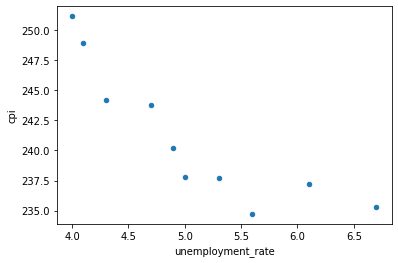

In [117]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()

### Exercise 3 - merge_ordered() caution, multiple columns

When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

Result: When you merge on date first, the table is sorted by date then country. When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and the Sweden for the remainder of the year. This is not what you want. The fill forward is using unintended data to fill in the missing values. However, when you merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.

In [118]:
gdp_list = [[pd.Timestamp('1990-01-01 00:00:00'), 'Australia', 158051.1324, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-04-01 00:00:00'), 'Australia', 158263.5816, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-07-01 00:00:00'), 'Australia', 157329.279, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-09-01 00:00:00'), 'Australia', 158240.6781, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-01-01 00:00:00'), 'Australia', 156195.9535, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-04-01 00:00:00'), 'Australia', 155989.0327, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-07-01 00:00:00'), 'Australia', 156635.8576, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-09-01 00:00:00'), 'Australia', 156744.0566, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-01-01 00:00:00'), 'Australia', 157916.0811, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-04-01 00:00:00'), 'Australia', 159047.8271, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-07-01 00:00:00'), 'Australia', 160658.176, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-09-01 00:00:00'), 'Australia', 163960.2207, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-01-01 00:00:00'), 'Australia', 165097.4951, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-04-01 00:00:00'), 'Australia', 166027.059, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-07-01 00:00:00'), 'Australia', 166203.1786, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-09-01 00:00:00'), 'Australia', 169279.3479, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-01-01 00:00:00'), 'Sweden', 79837.84599, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-04-01 00:00:00'), 'Sweden', 80582.28597000001, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-07-01 00:00:00'), 'Sweden', 79974.36017, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-09-01 00:00:00'), 'Sweden', 80106.49738, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-01-01 00:00:00'), 'Sweden', 79524.24192, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-04-01 00:00:00'), 'Sweden', 79073.05901, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-07-01 00:00:00'), 'Sweden', 79084.77036000001, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-09-01 00:00:00'), 'Sweden', 79740.60625, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-01-01 00:00:00'), 'Sweden', 79390.92175, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-04-01 00:00:00'), 'Sweden', 79060.28297999999, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-07-01 00:00:00'), 'Sweden', 78904.60477, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-09-01 00:00:00'), 'Sweden', 76996.83684, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-01-01 00:00:00'), 'Sweden', 75783.58777, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-04-01 00:00:00'), 'Sweden', 76708.54823, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-07-01 00:00:00'), 'Sweden', 77662.01816, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-09-01 00:00:00'), 'Sweden', 77703.30364, 'NYGDPMKTPSAKD']]
gdp = pd.DataFrame(gdp_list, columns=['date', 'country', 'gdp', 'series_code'])

pop_list = [[pd.Timestamp('1990-01-01 00:00:00'), 'Australia', 17065100, 'SP.POP.TOTL'], [pd.Timestamp('1991-01-01 00:00:00'), 'Australia', 17284000, 'SP.POP.TOTL'], [pd.Timestamp('1992-01-01 00:00:00'), 'Australia', 17495000, 'SP.POP.TOTL'], [pd.Timestamp('1993-01-01 00:00:00'), 'Australia', 17667000, 'SP.POP.TOTL'], [pd.Timestamp('1990-01-01 00:00:00'), 'Sweden', 8558835, 'SP.POP.TOTL'], [pd.Timestamp('1991-01-01 00:00:00'), 'Sweden', 8617375, 'SP.POP.TOTL'], [pd.Timestamp('1992-01-01 00:00:00'), 'Sweden', 8668067, 'SP.POP.TOTL'], [pd.Timestamp('1993-01-01 00:00:00'), 'Sweden', 8718561, 'SP.POP.TOTL']]
pop = pd.DataFrame(pop_list, columns=['date', 'country', 'gdp', 'series_code'])

In [119]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date', 'country'], 
                             fill_method='ffill')
print(ctry_date)

         date    country         gdp_x  series_code_x     gdp_y series_code_y
0  1990-01-01  Australia  158051.13240  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1  1990-01-01     Sweden   79837.84599  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2  1990-04-01  Australia  158263.58160  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3  1990-04-01     Sweden   80582.28597  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4  1990-07-01  Australia  157329.27900  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
5  1990-07-01     Sweden   79974.36017  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
6  1990-09-01  Australia  158240.67810  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
7  1990-09-01     Sweden   80106.49738  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
8  1991-01-01  Australia  156195.95350  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
9  1991-01-01     Sweden   79524.24192  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
10 1991-04-01  Australia  155989.03270  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
11 1991-04-01     Sweden   79073.05901  NYGDPMKTPSAKD   8617375 

In [120]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['country', 'date'], 
                             fill_method='ffill')
print(date_ctry)

         date    country         gdp_x  series_code_x     gdp_y series_code_y
0  1990-01-01  Australia  158051.13240  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1  1990-04-01  Australia  158263.58160  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
2  1990-07-01  Australia  157329.27900  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
3  1990-09-01  Australia  158240.67810  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
4  1991-01-01  Australia  156195.95350  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
5  1991-04-01  Australia  155989.03270  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
6  1991-07-01  Australia  156635.85760  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
7  1991-09-01  Australia  156744.05660  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
8  1992-01-01  Australia  157916.08110  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
9  1992-04-01  Australia  159047.82710  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
10 1992-07-01  Australia  160658.17600  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
11 1992-09-01  Australia  163960.22070  NYGDPMKTPSAKD  17495000 

## Using `merge_asof()`

* A method for ordered or time-series data.
* Similar to a merge_ordered() left-join
  * Similar features as merge_ordered()
* Match on the nearest key column and not exact matches.
  * Merged "on" columns must be sorted.


In [122]:
if False:
    pd.merge_asof(visa, ibm, on='date_time',
                  suffixes=('_visa', '_ibm'))

'''
* Our output is similar to a left join, so we see all of the rows from the left Visa table.
* However, the values from the IBM table are based on how close the date_time values match 
with the Visa table.
'''

'\n* Our output is similar to a left join, so we see all of the rows from the left Visa table.\n* However, the values from the IBM table are based on how close the date_time values match \nwith the Visa table.\n'

### merge_asof() example with direction

* We can list the direction argument as "forward".
* This will change the behavior of the method to select the first row in the right table whose "on" key column is greater than or equal to the left's key column. 
  * The default value for the direction argument is "backward".
* We can also set the direction argument to "nearest" which returns the nearest row in the right table regardless if it is forward or backwards.

In [ ]:
if False:
    pd.merge_asof(visa, ibm, on=['date_time'],
                  suffixes=('_visa', '_ibm'),
                  direction='forward')

### When to use merge_asof()

* Data sampled from a process
  * You might think of this method when you are working with data sampled from a process and the dates or times may not exactly align. 
* Developing a training set (no data leakage)
  * It could also be used when you are working on a time-series training set, where you do not want any events from the future to be visible before that point in time.

### Example 1 - Using merge_asof() to study stocks

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

In [ ]:
jpm_list = [[pd.Timestamp('2017-11-17 15:35:17'), 98.12], [pd.Timestamp('2017-11-17 15:40:04'), 98.18], [pd.Timestamp('2017-11-17 15:45:01'), 97.7307], [pd.Timestamp('2017-11-17 15:50:55'), 97.74], [pd.Timestamp('2017-11-17 15:55:00'), 97.815], [pd.Timestamp('2017-11-17 16:00:30'), 98.02], [pd.Timestamp('2017-11-17 16:05:07'), 97.8], [pd.Timestamp('2017-11-17 16:10:08'), 97.84], [pd.Timestamp('2017-11-17 16:15:11'), 97.71], [pd.Timestamp('2017-11-17 16:20:29'), 97.76], [pd.Timestamp('2017-11-17 16:25:25'), 97.82], [pd.Timestamp('2017-11-17 16:30:53'), 97.95], [pd.Timestamp('2017-11-17 16:35:11'), 97.99], [pd.Timestamp('2017-11-17 16:40:44'), 98.06], [pd.Timestamp('2017-11-17 16:45:52'), 98.05], [pd.Timestamp('2017-11-17 16:50:37'), 98.1101], [pd.Timestamp('2017-11-17 16:55:02'), 98.18]]
jpm = pd.DataFrame(jpm_list, columns=['date_time', 'close'])

wells_list = [[pd.Timestamp('2017-11-17 15:35:08'), 54.3227], [pd.Timestamp('2017-11-17 15:40:00'), 54.32], [pd.Timestamp('2017-11-17 15:45:32'), 54.19], [pd.Timestamp('2017-11-17 15:50:07'), 54.17], [pd.Timestamp('2017-11-17 15:55:00'), 54.1841], [pd.Timestamp('2017-11-17 16:00:30'), 54.265], [pd.Timestamp('2017-11-17 16:05:52'), 54.2], [pd.Timestamp('2017-11-17 16:10:22'), 54.155], [pd.Timestamp('2017-11-17 16:15:43'), 54.19], [pd.Timestamp('2017-11-17 16:20:07'), 54.205], [pd.Timestamp('2017-11-17 16:25:13'), 54.23], [pd.Timestamp('2017-11-17 16:30:04'), 54.22], [pd.Timestamp('2017-11-17 16:35:32'), 54.22], [pd.Timestamp('2017-11-17 16:40:09'), 54.28], [pd.Timestamp('2017-11-17 16:45:24'), 54.24], [pd.Timestamp('2017-11-17 16:50:28'), 54.17], [pd.Timestamp('2017-11-17 16:55:42'), 54.18]]
wells = pd.DataFrame(wells_list, columns=['date_time', 'close'])

bac_list = [[pd.Timestamp('2017-11-17 15:35:17'), 26.552], [pd.Timestamp('2017-11-17 15:40:06'), 26.552], [pd.Timestamp('2017-11-17 15:45:05'), 26.388], [pd.Timestamp('2017-11-17 15:50:34'), 26.378], [pd.Timestamp('2017-11-17 15:55:06'), 26.383000000000003], [pd.Timestamp('2017-11-17 16:00:18'), 26.451999999999998], [pd.Timestamp('2017-11-17 16:05:20'), 26.373], [pd.Timestamp('2017-11-17 16:10:05'), 26.388], [pd.Timestamp('2017-11-17 16:15:07'), 26.369], [pd.Timestamp('2017-11-17 16:20:29'), 26.388], [pd.Timestamp('2017-11-17 16:25:00'), 26.467], [pd.Timestamp('2017-11-17 16:30:18'), 26.482], [pd.Timestamp('2017-11-17 16:35:08'), 26.491999999999997], [pd.Timestamp('2017-11-17 16:40:46'), 26.526999999999997], [pd.Timestamp('2017-11-17 16:45:55'), 26.522], [pd.Timestamp('2017-11-17 16:50:05'), 26.546999999999997], [pd.Timestamp('2017-11-17 16:55:02'), 26.566999999999997]]
bac = pd.DataFrame(bac_list, columns=['date_time', 'close'])

In [ ]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', direction='nearest', suffixes=('', '_wells'))

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', direction='nearest', suffixes=('_jpm', '_bac'))

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

* You can see that during this period, the price change for these bank stocks was roughly the same, although the price change for JP Morgan was more variable. The critical point here is that the merge_asof() function is very useful in performing the fuzzy matching between the timestamps of all the tables.

### Exercise 2 - Using merge_asof() to create datase

The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

In [ ]:
gdp_list = [[pd.Timestamp('1979-01-01 00:00:00'), 2526.61], [pd.Timestamp('1979-04-01 00:00:00'), 2591.2470000000003], [pd.Timestamp('1979-07-01 00:00:00'), 2667.565], [pd.Timestamp('1979-10-01 00:00:00'), 2723.883], [pd.Timestamp('1980-01-01 00:00:00'), 2789.842], [pd.Timestamp('1980-04-01 00:00:00'), 2797.3520000000003], [pd.Timestamp('1980-07-01 00:00:00'), 2856.4829999999997], [pd.Timestamp('1980-10-01 00:00:00'), 2985.5570000000002], [pd.Timestamp('1981-01-01 00:00:00'), 3124.2059999999997], [pd.Timestamp('1981-04-01 00:00:00'), 3162.532], [pd.Timestamp('1981-07-01 00:00:00'), 3260.6090000000004], [pd.Timestamp('1981-10-01 00:00:00'), 3280.8179999999998], [pd.Timestamp('1982-01-01 00:00:00'), 3274.302], [pd.Timestamp('1982-04-01 00:00:00'), 3331.972], [pd.Timestamp('1982-07-01 00:00:00'), 3366.322], [pd.Timestamp('1982-10-01 00:00:00'), 3402.5609999999997], [pd.Timestamp('1983-01-01 00:00:00'), 3473.413], [pd.Timestamp('1983-04-01 00:00:00'), 3578.848], [pd.Timestamp('1983-07-01 00:00:00'), 3689.179], [pd.Timestamp('1983-10-01 00:00:00'), 3794.7059999999997], [pd.Timestamp('1984-01-01 00:00:00'), 3908.054], [pd.Timestamp('1984-04-01 00:00:00'), 4009.6009999999997], [pd.Timestamp('1984-07-01 00:00:00'), 4084.25], [pd.Timestamp('1984-10-01 00:00:00'), 4148.5509999999995]]
gdp = pd.DataFrame(gdp_list, columns=['date', 'gdp'])

recession_list = [[pd.Timestamp('1980-01-01 00:00:00'), 'recession'], [pd.Timestamp('1980-08-01 00:00:00'), 'normal'], [pd.Timestamp('1981-07-01 00:00:00'), 'recession'], [pd.Timestamp('1982-12-01 00:00:00'), 'normal'], [pd.Timestamp('1990-07-01 00:00:00'), 'recession'], [pd.Timestamp('1991-04-01 00:00:00'), 'normal'], [pd.Timestamp('2001-03-01 00:00:00'), 'recession'], [pd.Timestamp('2001-12-01 00:00:00'), 'normal'], [pd.Timestamp('2007-12-01 00:00:00'), 'recession'], [pd.Timestamp('2009-07-01 00:00:00'), 'normal']]
recession = pd.DataFrame(recession_list, columns=['date', 'econ_status'])

In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

* You can see from the chart that there were a number of quarters early in the 1980s where a recession was an issue. merge_asof() allowed you to quickly add a flag to the gdp dataset by matching between two different dates, in one line of code! If you were to perform the same task using subsetting, it would have taken a lot more code.

## Selecting data with `.query()`

`.query('SOME SELECTION STATEMENT')`

* Accepts an input string
  * Input string used to determine what rows are returned
  * Input string similar to statement aer **WHERE** clause in **SQL** statement
     * **Prior knowledge of SQL is not necessary**



In [ ]:
# Example: dataset 'stocks', columns=['date', 'disney', 'nike']

if False:
    stocks.query('nike >= 90')
    # Select the rows where Nike is equal to or above 90

### Querying on a multiple conditions, "and", "or"

In [ ]:
if False:
    stocks.query('nike > 90 and disney < 140')

if False:
    stocks.query('nike > 96 or disney < 98')

### Using .query() to select text

* When checking text, we use the double equal signs, similar to an if statement in Python.
* Also, when checking a text string, we used double quotes to surround the word. 
  * This is to avoid unintentionally ending our string statement since we used single quotes to start the statement. 

In [ ]:
# Example dataset 'stogs_long', columns=['date', 'stock', 'close']

if False:
    stocks.query('stock=="disney" or (stock=="nike" and close < 90)')

### Exercise 1 - Explore financials with .query()

You have been given a table of financial data from some popular social network companies called social_fin. All of the values are in thousands of US dollars.

In [123]:
social_fin_list = [['total_revenue', 'twitter', '2019', 3459329], ['cost_of_revenue', 'twitter', '2019', 1137041], ['gross_profit', 'twitter', '2019', 2322288], ['operating_expenses', 'twitter', '2019', 1955915], ['net_income', 'twitter', '2019', 1465659], ['total_revenue', 'facebook', '2019', 70697000], ['cost_of_revenue', 'facebook', '2019', 12770000], ['gross_profit', 'facebook', '2019', 57927000], ['operating_expenses', 'facebook', '2019', 33941000], ['net_income', 'facebook', '2019', 18485000], ['total_revenue', 'snap', '2019', 1715534], ['cost_of_revenue', 'snap', '2019', 895838], ['gross_profit', 'snap', '2019', 819696], ['operating_expenses', 'snap', '2019', 1923024], ['net_income', 'snap', '2019', -1033660], ['total_revenue', 'twitter', '2018', 3042359], ['cost_of_revenue', 'twitter', '2018', 964997], ['gross_profit', 'twitter', '2018', 2077362], ['operating_expenses', 'twitter', '2018', 1624037], ['net_income', 'twitter', '2018', 1205596], ['total_revenue', 'facebook', '2018', 55838000], ['cost_of_revenue', 'facebook', '2018', 9355000], ['gross_profit', 'facebook', '2018', 46483000], ['operating_expenses', 'facebook', '2018', 21570000], ['net_income', 'facebook', '2018', 22112000], ['total_revenue', 'snap', '2018', 1180446], ['cost_of_revenue', 'snap', '2018', 798865], ['gross_profit', 'snap', '2018', 381581], ['operating_expenses', 'snap', '2018', 1650031], ['net_income', 'snap', '2018', -1255911], ['total_revenue', 'twitter', '2017', 2443299], ['cost_of_revenue', 'twitter', '2017', 861242], ['gross_profit', 'twitter', '2017', 1582057], ['operating_expenses', 'twitter', '2017', 1543317], ['net_income', 'twitter', '2017', -108063], ['total_revenue', 'facebook', '2017', 40653000], ['cost_of_revenue', 'facebook', '2017', 5454000], ['gross_profit', 'facebook', '2017', 35199000], ['operating_expenses', 'facebook', '2017', 14996000], ['net_income', 'facebook', '2017', 15934000], ['total_revenue', 'snap', '2017', 824949], ['cost_of_revenue', 'snap', '2017', 717462], ['gross_profit', 'snap', '2017', 107487], ['operating_expenses', 'snap', '2017', 3593063], ['net_income', 'snap', '2017', -3445066], ['total_revenue', 'twitter', '2016', 2529619], ['cost_of_revenue', 'twitter', '2016', 932240], ['gross_profit', 'twitter', '2016', 1597379], ['operating_expenses', 'twitter', '2016', 1964587], ['net_income', 'twitter', '2016', -456873], ['total_revenue', 'facebook', '2016', 27638000], ['cost_of_revenue', 'facebook', '2016', 3789000], ['gross_profit', 'facebook', '2016', 23849000], ['operating_expenses', 'facebook', '2016', 11422000], ['net_income', 'facebook', '2016', 10217000], ['total_revenue', 'snap', '2016', 404482], ['cost_of_revenue', 'snap', '2016', 451660], ['gross_profit', 'snap', '2016', -47178], ['operating_expenses', 'snap', '2016', 473207], ['net_income', 'snap', '2016', -514643]]
social_fin = pd.DataFrame(social_fin_list, columns=['financial', 'company', 'year', 'value'])
social_fin.head(3)

,financial,company,year,value
0,total_revenue,twitter,2019,3459329
1,cost_of_revenue,twitter,2019,1137041
2,gross_profit,twitter,2019,2322288


In [124]:
social_fin.query('value > 50000000')

,financial,company,year,value
5,total_revenue,facebook,2019,70697000
7,gross_profit,facebook,2019,57927000
20,total_revenue,facebook,2018,55838000


In [125]:
social_fin.query('company=="facebook" and financial=="total_revenue"')

,financial,company,year,value
5,total_revenue,facebook,2019,70697000
20,total_revenue,facebook,2018,55838000
35,total_revenue,facebook,2017,40653000
50,total_revenue,facebook,2016,27638000


In [126]:
social_fin.query('financial=="net_income" and value<0')

,financial,company,year,value
14,net_income,snap,2019,-1033660
29,net_income,snap,2018,-1255911
34,net_income,twitter,2017,-108063
44,net_income,snap,2017,-3445066
49,net_income,twitter,2016,-456873
59,net_income,snap,2016,-514643


### Exercise 2 - Subsetting rows with .query()

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

In [130]:
gdp_list = [[pd.Timestamp('1990-01-01 00:00:00'), 'Australia', 158051.1324, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-04-01 00:00:00'), 'Australia', 158263.5816, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-07-01 00:00:00'), 'Australia', 157329.279, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-09-01 00:00:00'), 'Australia', 158240.6781, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-01-01 00:00:00'), 'Australia', 156195.9535, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-04-01 00:00:00'), 'Australia', 155989.0327, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-07-01 00:00:00'), 'Australia', 156635.8576, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-09-01 00:00:00'), 'Australia', 156744.0566, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-01-01 00:00:00'), 'Australia', 157916.0811, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-04-01 00:00:00'), 'Australia', 159047.8271, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-07-01 00:00:00'), 'Australia', 160658.176, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-09-01 00:00:00'), 'Australia', 163960.2207, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-01-01 00:00:00'), 'Australia', 165097.4951, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-04-01 00:00:00'), 'Australia', 166027.059, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-07-01 00:00:00'), 'Australia', 166203.1786, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-09-01 00:00:00'), 'Australia', 169279.3479, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-01-01 00:00:00'), 'Sweden', 79837.84599, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-04-01 00:00:00'), 'Sweden', 80582.28597000001, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-07-01 00:00:00'), 'Sweden', 79974.36017, 'NYGDPMKTPSAKD'], [pd.Timestamp('1990-09-01 00:00:00'), 'Sweden', 80106.49738, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-01-01 00:00:00'), 'Sweden', 79524.24192, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-04-01 00:00:00'), 'Sweden', 79073.05901, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-07-01 00:00:00'), 'Sweden', 79084.77036000001, 'NYGDPMKTPSAKD'], [pd.Timestamp('1991-09-01 00:00:00'), 'Sweden', 79740.60625, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-01-01 00:00:00'), 'Sweden', 79390.92175, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-04-01 00:00:00'), 'Sweden', 79060.28297999999, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-07-01 00:00:00'), 'Sweden', 78904.60477, 'NYGDPMKTPSAKD'], [pd.Timestamp('1992-09-01 00:00:00'), 'Sweden', 76996.83684, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-01-01 00:00:00'), 'Sweden', 75783.58777, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-04-01 00:00:00'), 'Sweden', 76708.54823, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-07-01 00:00:00'), 'Sweden', 77662.01816, 'NYGDPMKTPSAKD'], [pd.Timestamp('1993-09-01 00:00:00'), 'Sweden', 77703.30364, 'NYGDPMKTPSAKD']]
gdp = pd.DataFrame(gdp_list, columns=['date', 'country', 'gdp', 'series_code'])

pop_list = [[pd.Timestamp('1990-01-01 00:00:00'), 'Australia', 17065100, 'SP.POP.TOTL'], [pd.Timestamp('1991-01-01 00:00:00'), 'Australia', 17284000, 'SP.POP.TOTL'], [pd.Timestamp('1992-01-01 00:00:00'), 'Australia', 17495000, 'SP.POP.TOTL'], [pd.Timestamp('1993-01-01 00:00:00'), 'Australia', 17667000, 'SP.POP.TOTL'], [pd.Timestamp('1990-01-01 00:00:00'), 'Sweden', 8558835, 'SP.POP.TOTL'], [pd.Timestamp('1991-01-01 00:00:00'), 'Sweden', 8617375, 'SP.POP.TOTL'], [pd.Timestamp('1992-01-01 00:00:00'), 'Sweden', 8668067, 'SP.POP.TOTL'], [pd.Timestamp('1993-01-01 00:00:00'), 'Sweden', 8718561, 'SP.POP.TOTL']]
pop = pd.DataFrame(pop_list, columns=['date', 'country', 'pop', 'series_code'])

In [140]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')
print(gdp_pop.head(5))

        date    country          gdp  series_code_x       pop series_code_y
0 1990-01-01  Australia  158051.1324  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1 1990-04-01  Australia  158263.5816  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
2 1990-07-01  Australia  157329.2790  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
3 1990-09-01  Australia  158240.6781  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
4 1991-01-01  Australia  156195.9535  NYGDPMKTPSAKD  17284000   SP.POP.TOTL


In [139]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']
print(gdp_pop.head(5))

        date    country          gdp  series_code_x       pop series_code_y  gdp_per_capita
0 1990-01-01  Australia  158051.1324  NYGDPMKTPSAKD  17065100   SP.POP.TOTL        0.009262
1 1990-04-01  Australia  158263.5816  NYGDPMKTPSAKD  17065100   SP.POP.TOTL        0.009274
2 1990-07-01  Australia  157329.2790  NYGDPMKTPSAKD  17065100   SP.POP.TOTL        0.009219
3 1990-09-01  Australia  158240.6781  NYGDPMKTPSAKD  17065100   SP.POP.TOTL        0.009273
4 1991-01-01  Australia  156195.9535  NYGDPMKTPSAKD  17284000   SP.POP.TOTL        0.009037


In [138]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', index='date', columns='country')
print(gdp_pivot.columns)
print(gdp_pivot.head(5))

Index(['Australia', 'Sweden'], dtype='object', name='country')
country     Australia    Sweden
date                           
1990-01-01   0.009262  0.009328
1990-04-01   0.009274  0.009415
1990-07-01   0.009219  0.009344
1990-09-01   0.009273  0.009360
1991-01-01   0.009037  0.009228


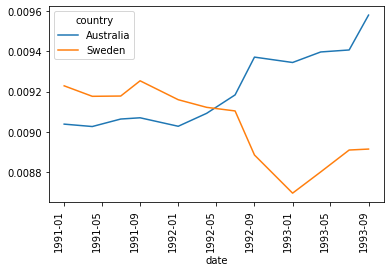

In [141]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date>="1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

## Reshaping data with `.melt()`

* The melt method will allow us to unpivot our dataset.
  * Turning a table from wide to long format. **(see pdf for image example)**
  * We can reduce the number of columns, to a more computer-friendly format.

* **Wide Format**: Every row relates to one subject, and each column has different information about an attribute of that subject.
  * Easier to read by people than long formatted.
* **Long Format / Tall Format**: One subject is found over many rows, and each row has one attribute about that subject.
  * More accessible for computers to work with.

In [142]:
# Example: dataset social_fin, columns=['financial', 'company', '2019', '2018', '2017', '2016']

if False:
    social_fin_tall = social_fin.melt(id_vars=['financial', 'company'])
    print(social_fin_tall.head(10))
    # Years are changed from horizontal placement to vertical placement

'''
* 'id_vars' are columns in our dataset that we do not want to change
* The melt() method creates 2 columns named 'variable' and 'value', 
melting the columns '2019', '2018', '2017' and '2016'
'''

### Melting with value_vars

* 'value_vars' argument allow us to control which columns are unpivoted.


In [ ]:
# Example: dataset social_fin, columns=['financial', 'company', '2019', '2018', '2017', '2016']

if False:
    social_fin_tall = social_fin.melt(id_vars=['financial', 'company'],
                                      value_vars=['2018', '2017'])
    print(social_fin_tall.head(9))

'''
* We unpinot (melt) just columns '2018' and '2017'
* Columns '2019' and '2016' are ignored in the reuslting dataframe
'''

### Melting with column names

* **'var_name'** argument allo us to set the name of the year columns in the output.
* **'value_name'** argument allow us to set the name of the value columns in the output.

In [143]:
# Example: dataset social_fin, columns=['financial', 'company', '2019', '2018', '2017', '2016']

if False:
    social_fin_tall = social_fin.melt(id_vars=['financial', 'company'],
                                      value_vars=['2018', '2017'],
                                      var_name=['year'], value_name='dollars')
    print(social_fin_tall.head(9))

### Exercie 1 - Select the right .melt() arguments

In [146]:
inflation_list = [['Brazil', 'Inflation %', 3.45, 3.66, 3.73], ['Canada', 'Inflation %', 1.6, 2.27, 1.95], ['France', 'Inflation %', 1.03, 1.85, 1.11], ['India', 'Inflation %', 2.49, 4.86, 7.66]]
inflation = pd.DataFrame(inflation_list, columns=['country', 'indicator', '2017', '2018', '2019'])
print(inflation.head(5))

  country    indicator  2017  2018  2019
0  Brazil  Inflation %  3.45  3.66  3.73
1  Canada  Inflation %  1.60  2.27  1.95
2  France  Inflation %  1.03  1.85  1.11
3   India  Inflation %  2.49  4.86  7.66


In [148]:
# Using melt()
print(inflation.melt(id_vars=['country','indicator'], 
               var_name='year', value_name='annual'))

   country    indicator  year  annual
0   Brazil  Inflation %  2017    3.45
1   Canada  Inflation %  2017    1.60
2   France  Inflation %  2017    1.03
3    India  Inflation %  2017    2.49
4   Brazil  Inflation %  2018    3.66
5   Canada  Inflation %  2018    2.27
6   France  Inflation %  2018    1.85
7    India  Inflation %  2018    4.86
8   Brazil  Inflation %  2019    3.73
9   Canada  Inflation %  2019    1.95
10  France  Inflation %  2019    1.11
11   India  Inflation %  2019    7.66


### Exercise 2 - Using .melt() to reshape government data

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

In [150]:
# Dataset
import numpy as np

ur_wide_list = [['2010', 9.8, 9.8, 9.9, 9.9, 9.6, 9.4, 9.4, 9.5, 9.5, 9.4, 9.8, 9.3], ['2011', 9.1, 9.0, 9.0, 9.1, 9.0, 9.1, 9.0, 9.0, 9.0, 8.8, 8.6, 8.5], ['2012', 8.3, 8.3, 8.2, 8.2, 8.2, 8.2, 8.2, 8.1, 7.8, 7.8, 7.7, 7.9], ['2013', 8.0, 7.7, 7.5, 7.6, 7.5, 7.5, 7.3, 7.2, 7.2, 7.2, 6.9, 6.7], ['2014', 6.6, 6.7, 6.7, 6.2, 6.3, 6.1, 6.2, 6.1, 5.9, 5.7, 5.8, 5.6], ['2015', 5.7, 5.5, 5.4, 5.4, 5.6, 5.3, 5.2, 5.1, 5.0, 5.0, 5.1, 5.0], ['2016', 4.9, 4.9, 5.0, 5.0, 4.8, 4.9, 4.8, 4.9, 5.0, 4.9, 4.7, 4.7], ['2017', 4.7, 4.6, 4.4, 4.4, 4.4, 4.3, 4.3, 4.4, 4.2, 4.1, 4.2, 4.1], ['2018', 4.1, 4.1, 4.0, 4.0, 3.8, 4.0, 3.8, 3.8, 3.7, 3.8, 3.7, 3.9], ['2019', 4.0, 3.8, 3.8, 3.6, 3.6, 3.7, 3.7, 3.7, 3.5, 3.6, 3.5, 3.5], ['2020', 3.6, 3.5, 4.4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]]
ur_wide = pd.DataFrame(ur_wide_list, columns=['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
print(ur_wide.head())

   year  jan  feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec
0  2010  9.8  9.8  9.9  9.9  9.6  9.4  9.4  9.5  9.5  9.4  9.8  9.3
1  2011  9.1  9.0  9.0  9.1  9.0  9.1  9.0  9.0  9.0  8.8  8.6  8.5
2  2012  8.3  8.3  8.2  8.2  8.2  8.2  8.2  8.1  7.8  7.8  7.7  7.9
3  2013  8.0  7.7  7.5  7.6  7.5  7.5  7.3  7.2  7.2  7.2  6.9  6.7
4  2014  6.6  6.7  6.7  6.2  6.3  6.1  6.2  6.1  5.9  5.7  5.8  5.6


In [151]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')
print(ur_tall.head())

   year month  unempl_rate
0  2010   jan          9.8
1  2011   jan          9.1
2  2012   jan          8.3
3  2013   jan          8.0
4  2014   jan          6.6


In [153]:
# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])
print(ur_tall.head())

   year month  unempl_rate       date
0  2010   jan          9.8 2010-01-01
1  2011   jan          9.1 2011-01-01
2  2012   jan          8.3 2012-01-01
3  2013   jan          8.0 2013-01-01
4  2014   jan          6.6 2014-01-01


In [157]:
# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values(by='date')
print(ur_sorted.head())

    year month  unempl_rate       date
0   2010   jan          9.8 2010-01-01
11  2010   feb          9.8 2010-02-01
22  2010   mar          9.9 2010-03-01
33  2010   apr          9.9 2010-04-01
44  2010   may          9.6 2010-05-01


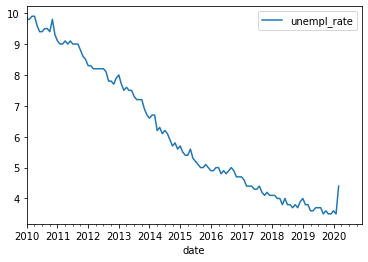

In [158]:
# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

### Exercise 3 - Using .melt() for stocks vs bond performance

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

In [161]:
# Datasets
ten_yr_list = [['open', 0.033490769, -0.060448691, 0.025425602000000002, -0.004312204, 0.060632307999999996, 0.02715394, -0.059232757000000004, -0.046270864, 0.014399646, -0.027080148999999998, -0.114702581, 0.022565922999999998, -0.09447061699999999, -0.024644031, -0.021336327999999998, 0.07601835900000001, 0.073047187, -0.020621118, 0.0, -0.024099442000000002, -0.025734338, 0.05042689400000001, -0.267716535, -0.23586541800000002, 0.285973672, 0.045887752000000004, -0.102598718, 0.191049267, 0.10672560800000001, 0.023965762999999998, -0.006687099, -0.046563815, -0.032068255, 0.034346505, -0.050543637999999995], ['high', -0.007337954, -0.040657083999999996, 0.022046233, 0.030575916, 0.08026823799999999, -0.021632807, -0.059796193, -0.038445808, 0.003615483, -0.055520237, -0.039488445, -0.053492175, -0.022704837000000002, -0.064646465, 0.049676026, 0.064557613, 0.044696787, -0.034690102, -0.020124581000000002, -0.045232274, 0.052240717, -0.035288391, -0.27169525699999997, -0.01073779, 0.06932773099999999, -0.004256713, 0.04110490000000001, 0.186986734, 0.068121341, -0.061783757, 0.031864047, -0.090324241, 0.012446958999999999, -0.004191115, 0.099326599], ['low', -0.016146629, -0.007984032, 0.031075341, -0.0021682570000000003, 0.059104737000000004, -0.027287649, -0.051676861, -0.043371886, 0.002557545, -0.10830241199999999, -0.00130039, -0.145572917, 0.074672356, -0.067498582, 0.043187348, 0.073469388, 0.047256926, -0.022562241, -0.001591934, -0.13632739800000002, 0.046153846, -0.138235294, -0.30443686, 0.059371932999999995, 0.21723019899999998, -0.062404870999999994, 0.068993506, 0.16818527, 0.12317192099999999, -0.055266204000000006, 0.039509954, -0.035945787, -0.050733495999999996, 0.030264005, 0.0071875], ['close', -0.05719022, 0.021538462, -0.003872633, 0.056155508, 0.029243354, -0.052056427999999995, -0.049046322, 0.009257218000000001, -0.022712383, -0.112402235, 0.015861027, -0.098141264, -0.028854081, -0.028862479, 0.09527972, 0.076350093, -0.016559565, 0.0, -0.041719025, 0.00367165, 0.037366083, -0.25516372800000003, -0.24112276, 0.267379679, 0.069268636, -0.11706675400000001, 0.163500931, 0.10915493, 0.016738817, -0.006244678, -0.028563268, -0.02763893, 0.025703054, -0.056308962000000004, 0.200562324]]
ten_yr = pd.DataFrame(ten_yr_list, columns=['metric', '2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01', '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01', '2008-01-01', '2008-02-01',
       '2008-03-01', '2008-04-01', '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01', '2009-03-01',
       '2009-04-01', '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01'])
print(ten_yr.head())

dji_list = [['2007-02-01', 0.005094385], ['2007-03-01', -0.02613902], ['2007-04-01', 0.04852522], ['2007-05-01', 0.052007442], ['2007-06-01', -0.016070328000000002], ['2007-07-01', 0.038005504], ['2007-08-01', -0.063894742], ['2007-09-01', 0.066521287], ['2007-10-01', 0.002475632], ['2007-11-01', -0.024041665], ['2007-12-01', -0.01062883], ['2008-01-01', -0.059491712999999995], ['2008-02-01', -0.035595773], ['2008-03-01', 0.013213023], ['2008-04-01', 0.020871591999999998], ['2008-05-01', -0.00143428], ['2008-06-01', -0.042702328], ['2008-07-01', -0.057398135], ['2008-08-01', 0.025433807000000003], ['2008-09-01', -0.069100093], ['2008-10-01', -0.15418084599999998], ['2008-11-01', -0.080309949], ['2008-12-01', 0.058127134000000004], ['2009-01-01', -0.037496447999999995], ['2009-02-01', -0.16479474300000002], ['2009-03-01', 0.042397187999999995], ['2009-04-01', 0.064512765], ['2009-05-01', 0.05677603], ['2009-06-01', 0.038969204], ['2009-07-01', -0.047834178], ['2009-08-01', 0.11097163], ['2009-09-01', 0.05759352], ['2009-10-01', -0.007827874], ['2009-11-01', 0.07739017599999999], ['2009-12-01', -0.003478498], ['2010-01-01', -0.022410836], ['2010-02-01', 0.012850318999999999], ['2010-03-01', 0.050855723], ['2010-04-01', 0.01551093], ['2010-05-01', -0.080054868], ['2010-06-01', -0.035769399], ['2010-07-01', 0.078133736], ['2010-08-01', -0.034476195], ['2010-09-01', 0.067414235], ['2010-10-01', 0.023774684], ['2010-11-01', -0.002383415], ['2010-12-01', 0.039776433], ['2011-01-01', 0.031101532], ['2011-02-01', 0.014329031], ['2011-03-01', -0.0021388789999999998], ['2011-04-01', 0.032418077999999996], ['2011-05-01', 0.001198984], ['2011-06-01', -0.002194236], ['2011-07-01', 0.002626051], ['2011-08-01', -0.06695646], ['2011-09-01', -0.03640589], ['2011-10-01', 0.025681987000000003], ['2011-11-01', 0.001359161], ['2011-12-01', 0.045912125], ['2012-01-01', 0.052597849], ['2012-02-01', 0.017741846000000002], ['2012-03-01', 0.025919756000000002], ['2012-04-01', -0.009181033], ['2012-05-01', -0.053259198], ['2012-06-01', 0.034768257000000004], ['2012-07-01', -0.00014041799999999998], ['2012-08-01', 0.0350163], ['2012-09-01', 0.024247324], ['2012-10-01', -0.018273602], ['2012-11-01', -0.026968932], ['2012-12-01', 0.011859747], ['2013-01-01', 0.028023244], ['2013-02-01', 0.036520977999999996], ['2013-03-01', 0.023491879], ['2013-04-01', 0.037377411], ['2013-05-01', 0.016851552], ['2013-06-01', -0.000224894], ['2013-07-01', 0.025628287000000003], ['2013-08-01', -0.042491667999999996], ['2013-09-01', 0.028118227000000003], ['2013-10-01', 0.007576228000000001], ['2013-11-01', 0.032678999], ['2013-12-01', 0.018379701000000002], ['2014-01-01', 0.015901757], ['2014-02-01', -0.014940513], ['2014-03-01', 0.014771536000000002], ['2014-04-01', 0.007107820999999999], ['2014-05-01', 0.010994522], ['2014-06-01', 0.006544182], ['2014-07-01', -0.993017009], ['2014-08-01', 144.5183012], ['2014-09-01', -0.003245918], ['2014-10-01', 0.020395567], ['2014-11-01', 0.025168869], ['2014-12-01', -0.000286042], ['2015-01-01', -0.03692956], ['2015-02-01', 0.056382432], ['2015-03-01', -0.019666107], ['2015-04-01', 0.014750208], ['2015-05-01', -0.0015301639999999999], ['2015-06-01', -0.021720378999999998], ['2015-07-01', 0.006379318], ['2015-08-01', -0.067894606], ['2015-09-01', -0.025750218], ['2015-10-01', 0.096948254], ['2015-11-01', 0.003193047], ['2015-12-01', -0.016642328], ['2016-01-01', -0.055018607000000004], ['2016-02-01', 0.003048603], ['2016-03-01', 0.070753465], ['2016-04-01', 0.0050042129999999995], ['2016-05-01', 0.000765158], ['2016-06-01', 0.008028289000000001], ['2016-07-01', 0.02800888], ['2016-08-01', -0.001698052], ['2016-09-01', -0.005037860999999999], ['2016-10-01', -0.009055988000000001], ['2016-11-01', 0.054083208], ['2016-12-01', 0.033414211], ['2017-01-01', 0.005135964], ['2017-02-01', 0.047729302], ['2017-03-01', -0.007159263000000001], ['2017-04-01', 0.013420031], ['2017-05-01', 0.0032568090000000003], ['2017-06-01', 0.01622663], ['2017-07-01', 0.025363472999999997], ['2017-08-01', 0.002603798], ['2017-09-01', 0.020821848], ['2017-10-01', 0.04338742599999999], ['2017-11-01', 0.038293773999999996], ['2017-12-01', 0.01840769], ['2018-01-01', 0.057857909000000006], ['2018-02-01', -0.042838503], ['2018-03-01', -0.034663499], ['2018-04-01', 6.208199999999999e-05], ['2018-05-01', 0.010458144], ['2018-06-01', -0.005914219], ['2018-07-01', 0.047125374000000005], ['2018-08-01', 0.021624917], ['2018-09-01', 0.019006501000000002], ['2018-10-01', -0.05074022], ['2018-11-01', 0.016830012], ['2018-12-01', -0.08657517099999999], ['2019-01-01', 0.071683602], ['2019-02-01', 0.036652472], ['2019-03-01', 0.000490015], ['2019-04-01', 0.025616447999999997], ['2019-05-01', -0.066856205], ['2019-06-01', 0.07810595299999999], ['2019-07-01', np.nan], ['2019-08-01', np.nan], ['2019-09-01', np.nan], ['2019-10-01', 0.006778502], ['2019-11-01', np.nan], ['2019-12-01', np.nan], ['2020-01-01', np.nan], ['2020-02-01', -0.010447310999999999], ['2020-03-01', -0.216145511], ['2020-04-01', 0.034803753]]
dji = pd.DataFrame(dji_list, columns=['date', 'close'])
print(dji.head())

  metric  2007-02-01  2007-03-01  2007-04-01  2007-05-01  2007-06-01  2007-07-01  2007-08-01  2007-09-01  2007-10-01  2007-11-01  2007-12-01  2008-01-01  2008-02-01  2008-03-01  2008-04-01  2008-05-01  2008-06-01  2008-07-01  2008-08-01  2008-09-01  2008-10-01  2008-11-01  2008-12-01  2009-01-01  2009-02-01  2009-03-01  2009-04-01  2009-05-01  2009-06-01  2009-07-01  2009-08-01  2009-09-01  2009-10-01  2009-11-01  2009-12-01
0   open    0.033491   -0.060449    0.025426   -0.004312    0.060632    0.027154   -0.059233   -0.046271    0.014400   -0.027080   -0.114703    0.022566   -0.094471   -0.024644   -0.021336    0.076018    0.073047   -0.020621    0.000000   -0.024099   -0.025734    0.050427   -0.267717   -0.235865    0.285974    0.045888   -0.102599    0.191049    0.106726    0.023966   -0.006687   -0.046564   -0.032068    0.034347   -0.050544
1   high   -0.007338   -0.040657    0.022046    0.030576    0.080268   -0.021633   -0.059796   -0.038446    0.003615   -0.055520   -0.039488  

In [163]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')
print(bond_perc.head())

  metric        date     close
0   open  2007-02-01  0.033491
1   high  2007-02-01 -0.007338
2    low  2007-02-01 -0.016147
3  close  2007-02-01 -0.057190
4   open  2007-03-01 -0.060449


In [164]:
# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric=="close"')
print(bond_perc_close.head())

   metric        date     close
3   close  2007-02-01 -0.057190
7   close  2007-03-01  0.021538
11  close  2007-04-01 -0.003873
15  close  2007-05-01  0.056156
19  close  2007-06-01  0.029243


In [167]:
# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, 
                            on='date', how='inner',
                            suffixes=('_dow', '_bond'))
print(dow_bond.head())

         date  close_dow metric  close_bond
0  2007-02-01   0.005094  close   -0.057190
1  2007-03-01  -0.026139  close    0.021538
2  2007-04-01   0.048525  close   -0.003873
3  2007-05-01   0.052007  close    0.056156
4  2007-06-01  -0.016070  close    0.029243


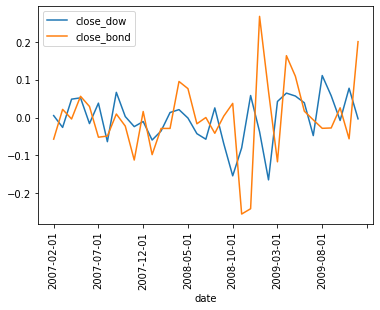

In [168]:
# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'],
              x='date', rot=90)
plt.show()

* You used many of the techniques we have reviewed in this chapter to produce the plot. The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.

# Course wrap-up

## Data merging basics

* Inner join using .merge()
* One-to-one and one-to-many relationships
* Merging multiple tables

## Merging tables with different join types

* Left, right, and outer joins
* Merging a table to itself and merging on indexes

## Advanced merging and concatenating

* Filtering joins
  * semi and anti joins
* Combining data vertically with `.concat()`
* Verify data integrity

## Merging ordered and time-series data

* Ordered data 
  * `merge_ordered()` and `merge_asof()`
* Manipulating data with `.melt()`